# Project Goals

# Data Dictionary
- gender: is the customer male or female?
- senior_citizen: is the customer a senior citizen? 1 for yes, 0 for no.
- partner: does the customer have a partner?
- dependents: does the customer have dependents?
- tenure: Number of months the customer has had one of our services. 0 would mean they haven't been with us a full month yet.
- phone_service: does the customer have phone service?
- multiple_lines: does the customer have multiple lines? yes, no, or no phone service.
- internet_service_type_id: id of type of internet service.
- online_security: does the customer utilize the option of having a password.
- online_backup: does the customer utilize the option to backup their files?
- device_protection: does the customer utilize the option to protect their internet device (i.e. router)?
- tech_support: does the customer utilize the option to talk to tech support?
- streaming_tv: does the customer have the tv streaming service?
- streaming_movies: does the customer have the movie streaming service?
- contract_type_id: id of type of contract.
- paperless_billing: customer using paperless billing option?
- payment_type_id: id of type of payment.
- monthly_charges: Most recent monthly charge for that customer.
- total_charges: Most recent total charges for that customer.
- churn: Did the customer churn?
- contract_type: type of contract.
- internet_service_type: type of internet service.
- payment_type: type of payment.
# <span style="color:red">ADD NEW DEFINITIONS FOR NEW FIELDS (FEATURES AND ENCODED)</span>

# Hypotheses

- The more services the customer has the less likely they are to churn. It would be difficult to switch to another service provider who was able to offer the same service plan.
###### A customer with multiple lines might be less inclined to churn due to having to move all the lines over. Likewise, those with streaming services will be less likely to churn. Basically, the more services a customer has the less likely to churn.


- If a customer is on a family plan they are less likely to churn. It might be difficult to find another plan to fit a larger group of people. The more lines there are the more complicated the switch would end up being.
###### A customers with multiple lines will have a decent effect on whether a customer churns or not.


- If a customer has "security servies"(see feature engineering) they are less likely to churn. Since the customer has access to forms of protection, security, and insurance they feel safer with that provider, and would be less willing to churn.

# <span style="color:red">ADD HYPOTHESIS FROM MATT AND SANDY NOTEBOOK</span>

# Feature Engineering

- Family Plan
    - Dependents
    - Partners
    - Multiple Lines
    - This would be a 0 or 1, and be determined by looking at the partner, dependents, and multiple lines.
- Total Services
    - Phone
    - Internet
    - Fiber
- Security Services
    - Online_Security
    - Device_Protection
    - Online_Backup
- <span style="color:red">It might be a good idea to make a new feature that shows how many services a customer has.</span>

# Other Ideas

- If online backup tells whether a customer uses our service to backup their data, this can be a useful variable in determining churn.
- If tech support is an option, I would think that customers who have that option available are less likely to churn

# Imports

In [1]:
#import modules

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support as pfs
from scipy.stats import ttest_ind
import sklearn.metrics as skm
import graphviz
from graphviz import Graph
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import io

# import personal files
from prepare import *
# import env #turn this on if the SQL pull is required

# Import CSV

In [2]:
# import files we made i.e. csv's and function files
df = pd.read_csv('telco_full_data.csv')

# Import from SQL
# <span style="color:red">FOR FINAL PRODUCT USE SQL QUERY NOT CSV</span>

In [3]:
# dbc = env.get_connection('telco_churn')
# telco_full = pd.read_sql('SELECT * FROM customers c JOIN contract_types ct\
#                             ON c.contract_type_id = ct.contract_type_id JOIN internet_service_types it\
#                             ON c.internet_service_type_id = it.internet_service_type_id JOIN payment_types pt\
#                             ON c.payment_type_id = pt.payment_type_id', dbc)
# telco_full.head()

In [4]:
df = prep_telco(df)

In [5]:
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
churn,No,No,No,Yes,Yes
tenure,9,9,7,1,1
tenure_year,0.75,0.75,0.58,0.08,0.08
in_tenure_year,1,1,1,1,1
monthly_charges,59.9,69.4,48.2,25.1,30.5
total_charges,542.4,571.45,340.35,25.1,30.5
payment_type,Mailed check,Credit card (automatic),Electronic check,Electronic check,Bank transfer (automatic)
payment_type_id,2,4,1,1,3
contract_type,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month


In [6]:
df.columns

Index(['customer_id', 'churn', 'tenure', 'tenure_year', 'in_tenure_year',
       'monthly_charges', 'total_charges', 'payment_type', 'payment_type_id',
       'contract_type', 'contract_type_id', 'internet_service_type',
       'internet_service_type_id', 'paperless_billing', 'gender',
       'senior_citizen', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'streaming_tv', 'streaming_movies', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'family_plan',
       'household', 'phone_id', 'streaming_services', 'online_security_backup',
       'monthly', 'payment_type_encode', 'internet_service_type_encode',
       'contract_type_encode', 'churn_encode', 'paperless_billing_encode',
       'streaming_movies_encode', 'streaming_tv_encode', 'tech_support_encode',
       'device_protection_encode', 'online_backup_encode',
       'online_security_encode', 'multiple_lines_encode',
       'phone_service_encode', 'dependents_encode', 'gender_encod

In [7]:
df_print_missing_vals(df)


Missing Values:

No missing values


In [8]:
df_print_metadata(df)

DATAFRAME METADATA
Size: 337536

Shape: 7032 x 48

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
customer_id                     7032 non-null object
churn                           7032 non-null object
tenure                          7032 non-null int64
tenure_year                     7032 non-null float64
in_tenure_year                  7032 non-null float64
monthly_charges                 7032 non-null float64
total_charges                   7032 non-null float32
payment_type                    7032 non-null object
payment_type_id                 7032 non-null int64
contract_type                   7032 non-null object
contract_type_id                7032 non-null int64
internet_service_type           7032 non-null object
internet_service_type_id        7032 non-null int64
paperless_billing               7032 non-null object
gender                          7032 non-null object
senior_citizen                  7032 non-

In [9]:
peekatdata(df)

First five rows of the dataframe:
  customer_id churn  tenure  tenure_year  in_tenure_year  monthly_charges  \
0  0003-MKNFE    No       9         0.75             1.0             59.9   
1  0013-MHZWF    No       9         0.75             1.0             69.4   
2  0015-UOCOJ    No       7         0.58             1.0             48.2   
3  0023-HGHWL   Yes       1         0.08             1.0             25.1   
4  0032-PGELS   Yes       1         0.08             1.0             30.5   

   total_charges               payment_type  payment_type_id   contract_type  \
0     542.400024               Mailed check                2  Month-to-month   
1     571.450012    Credit card (automatic)                4  Month-to-month   
2     340.350006           Electronic check                1  Month-to-month   
3      25.100000           Electronic check                1  Month-to-month   
4      30.500000  Bank transfer (automatic)                3  Month-to-month   

       ...        stre

# Family Plan

This variable can be either a 0 or 1. 1 means that the customer is likely part of a family plan, since they have a partner, have dependents, and have mulitple lines.

In [10]:
df.family_plan.value_counts()

0    6287
1     745
Name: family_plan, dtype: int64

#### Exploration

What is the overall churn rate?

In [11]:
overall_churn = df.churn_encode.mean()
overall_churn

0.26578498293515357

##### One way to discover drivers of churn is to find groups within the dataset that have significantly higher or lower rates of churn.

In [12]:
df_encoded = df

##### Looking at 'security options' to check if there is a difference.

##### <span style="color:red"> Consider using a kde plot for this </span>

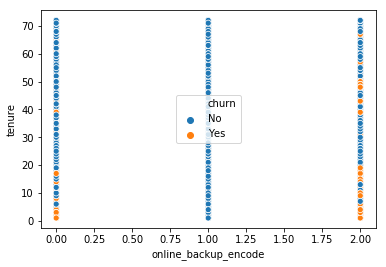

In [13]:
sns.scatterplot(data=df_encoded, x='online_backup_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

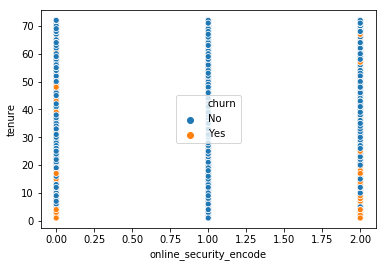

In [14]:
sns.scatterplot(data=df_encoded, x='online_security_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

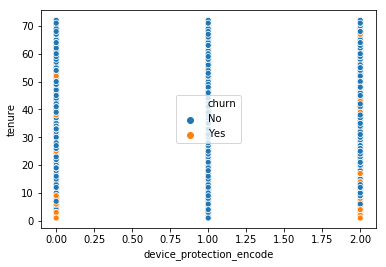

In [15]:
sns.scatterplot(data=df_encoded, x='device_protection_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

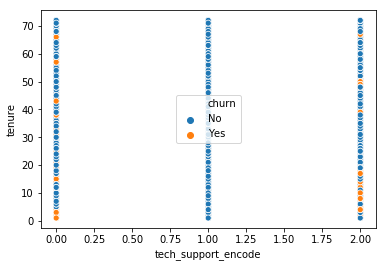

In [16]:
sns.scatterplot(data=df_encoded, x='tech_support_encode', y='tenure', hue='churn')
plt.legend(loc='best')
plt.show()

In [17]:
df_encoded[['online_backup_encode', 'online_backup']].sample(10)

,online_backup_encode,online_backup
2284,2,Yes
4910,2,Yes
5042,2,Yes
3448,2,Yes
1102,2,Yes
2538,0,No
5193,2,Yes
4061,0,No
4083,0,No
3508,0,No


##### Looking at this tells me that those customers without internet service seem to be churning less.

In [18]:
df_encoded.internet_service_type.unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [19]:
df_encoded.groupby('internet_service_type')['churn_encode'].mean()

internet_service_type
DSL            0.189983
Fiber optic    0.418928
None           0.074342
Name: churn_encode, dtype: float64

In [20]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['internet_service_type'].count()

internet_service_type  tech_support       
DSL                    No                     1242
                       Yes                    1174
Fiber optic            No                     2230
                       Yes                     866
None                   No internet service    1520
Name: internet_service_type, dtype: int64

##### While DSL users have a pretty even split of whether they use tech support or not, majority of fiber users do not use tech support.

Can this be a factor in churn? Are fiber users with tech support less likely to churn than those without?

In [21]:
fiber_no_tech = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.tech_support_encode == 0)]
fiber_with_tech = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.tech_support_encode == 2)]

print(fiber_no_tech.churn_encode.mean())
print(fiber_with_tech.churn_encode.mean())

ttest_ind(fiber_no_tech.churn_encode, fiber_with_tech.churn_encode)

0.49372197309417043
0.22632794457274827


Ttest_indResult(statistic=13.950307133580548, pvalue=6.0943037385951464e-43)

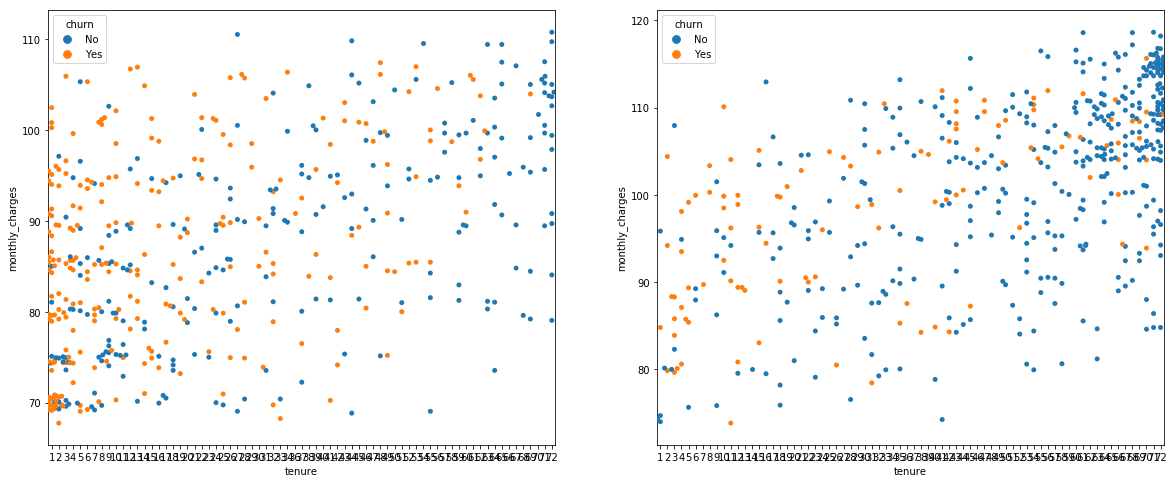

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.swarmplot(data=fiber_no_tech.sample(500), x='tenure', y='monthly_charges', hue='churn',)
plt.subplot(122)
sns.swarmplot(data=fiber_with_tech.sample(500), x='tenure', y='monthly_charges', hue='churn')
plt.show()

##### There is a significant difference in churn rate between fiber users with tech support and fiber users without tech support.

The churn rate for those with tech support is only 23%, actually below the overall churn rate. The churn rate for those without tech support is 49%, almost double the overall churn rate!

What does this say about tech support?

- tech support is an important factor when it comes to a user's decision to churn
- perhaps fiber has technical issues, and those that get it fixed stay, while those that don't leave
- why would some users not utilize tech support? have to pay for it?

A quick look at the average monthly charges shows that those with tech support might be paying more for it. To be sure the other variables need to be accounted for.

In [23]:
print('Average monthly charge for fiber users without tech support: ${:.2f}'
      .format(fiber_no_tech.monthly_charges.mean()))
print('Average monthly charge for fiber users with tech support: ${:.2f}'
      .format(fiber_with_tech.monthly_charges.mean()))

Average monthly charge for fiber users without tech support: $87.74
Average monthly charge for fiber users with tech support: $101.18


In [24]:

print('Average tenure for fiber users without tech support: {:.0f} months'
      .format(fiber_no_tech.tenure.mean()))
print('Average tenure for fiber users with tech support: {:.0f} months'
      .format(fiber_with_tech.tenure.mean()))

Average tenure for fiber users without tech support: 27 months
Average tenure for fiber users with tech support: 48 months


##### An overwhelming amount of fiber users without tech support are on a month to month plan. They are the group with the highest churn rate.

This freedom can help explain why these users are leaving. The users have trouble with fiber and instead of fixing it, they go to someone else.

This also shows that month to month contracts in general churn the most. This isn't surprising, but doesn't explain why are they churning. They aren't churning just because they can. As stated earlier, they are perhaps churning due to lack of tech support. Other variables can also cause people on month to month to churn.

In [25]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['contract_type'].count()

internet_service_type  tech_support         contract_type 
DSL                    No                   Month-to-month     884
                                            One year           244
                                            Two year           114
                       Yes                  Month-to-month     339
                                            One year           326
                                            Two year           509
Fiber optic            No                   Month-to-month    1796
                                            One year           313
                                            Two year           121
                       Yes                  Month-to-month     332
                                            One year           226
                                            Two year           308
None                   No internet service  Month-to-month     524
                                            One year           363
   

In [26]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['churn_encode'].mean()

internet_service_type  tech_support         contract_type 
DSL                    No                   Month-to-month    0.358597
                                            One year          0.098361
                                            Two year          0.035088
                       Yes                  Month-to-month    0.227139
                                            One year          0.088957
                                            Two year          0.015717
Fiber optic            No                   Month-to-month    0.575167
                                            One year          0.185304
                                            Two year          0.082645
                       Yes                  Month-to-month    0.388554
                                            One year          0.203540
                                            Two year          0.068182
None                   No internet service  Month-to-month    0.188931
                  

##### A break to look at the churn rates of the different 'security' variables¶

In [27]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['churn_encode'].mean()

internet_service_type  tech_support       
DSL                    No                     0.277778
                       Yes                    0.097104
Fiber optic            No                     0.493722
                       Yes                    0.226328
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [28]:
df_encoded.groupby(['internet_service_type', 'online_backup'])['churn_encode'].mean()

internet_service_type  online_backup      
DSL                    No                     0.257121
                       Yes                    0.107209
Fiber optic            No                     0.507701
                       Yes                    0.303053
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [29]:
df_encoded.groupby(['internet_service_type', 'online_security'])['churn_encode'].mean()

internet_service_type  online_security    
DSL                    No                     0.279839
                       Yes                    0.095238
Fiber optic            No                     0.493576
                       Yes                    0.218117
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [30]:
df_encoded.groupby(['internet_service_type', 'device_protection'])['churn_encode'].mean()

internet_service_type  device_protection  
DSL                    No                     0.252399
                       Yes                    0.110273
Fiber optic            No                     0.499712
                       Yes                    0.315402
None                   No internet service    0.074342
Name: churn_encode, dtype: float64

In [31]:
df_encoded[['contract_type_id', 'contract_type']].sample(10)

,contract_type_id,contract_type
1785,2,One year
5108,3,Two year
3813,1,Month-to-month
4937,2,One year
2877,1,Month-to-month
6192,2,One year
1033,1,Month-to-month
4070,1,Month-to-month
5464,3,Two year
159,1,Month-to-month


### 55% of customers are on month to month contracts.¶

In [32]:
df_encoded.loc[df.contract_type_id == 1].shape[0]/len(df_encoded)

0.551052332195677

In [33]:
df_encoded.loc[df.contract_type_id == 1]['churn_encode'].mean()

0.4270967741935484

We can't just get rid of month to month contracts though. This will cause the company to be less competitive, plus those MtM customers might only be with us because we offer MtM. If we take it away, there is no guarantee that they will switch to a contract.

### Checking senior citizen rate.

##### 16% of customers are senior citizens.¶

In [34]:
df_encoded.senior_citizen.mean()

0.16240045506257111

In [35]:
df_encoded.loc[df.senior_citizen == 1]['churn_encode'].mean()

0.4168126094570928

In [36]:
df_encoded.loc[df.senior_citizen == 0]['churn_encode'].mean()

0.2365025466893039

## 42% of senior citizens churn
While only 24% of those who aren't senior citizens do the same.

This doesn't mean we should ban senior citizens. Instead, why are senior citizens churning at such a high rate?

First, what does it mean for a senior citizen to churn? Hopefully they don't just die, but that's a possibility. The preferable way to think is that they are switching to another company for some reason, but what are those reasons?

- bad service?
- paying more?

Below we look at the group that has fiber without tech support and look at the percentage that are senior citizens.

In [37]:
df_encoded.loc[df_encoded.contract_type_id == 1].groupby('senior_citizen')['senior_citizen'].count()

senior_citizen
0    3068
1     807
Name: senior_citizen, dtype: int64

In [38]:
807/(3068+807)*100

20.825806451612902

21% of customers on MtM are senior citizens

#### 27% of fiber users are senior citizens.¶

In [39]:
df_encoded.groupby(['internet_service_type'])['senior_citizen'].mean()

internet_service_type
DSL            0.107202
Fiber optic    0.268411
None           0.034211
Name: senior_citizen, dtype: float64

##### Almost 30% of fiber users without tech support are senior citizens.¶

In [40]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['senior_citizen'].mean()

internet_service_type  tech_support       
DSL                    No                     0.136876
                       Yes                    0.075809
Fiber optic            No                     0.295964
                       Yes                    0.197460
None                   No internet service    0.034211
Name: senior_citizen, dtype: float64

##### 32% of fiber/no tech support/ month to month users are senior citizens.¶

In [41]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['senior_citizen'].mean().sort_values(ascending=False)

internet_service_type  tech_support         contract_type 
Fiber optic            No                   Month-to-month    0.316258
                                            One year          0.236422
                       Yes                  One year          0.221239
                                            Month-to-month    0.204819
                                            Two year          0.172078
                       No                   Two year          0.148760
DSL                    No                   Month-to-month    0.147059
                                            Two year          0.131579
                                            One year          0.102459
                       Yes                  Month-to-month    0.085546
                                            One year          0.076687
                                            Two year          0.068762
None                   No internet service  One year          0.044077
                  

### Churn rate is high, almost 60%, for senior citizens on fiber without tech and on MtM.

In [42]:
df_encoded.groupby(['internet_service_type', 
                    'tech_support', 
                    'contract_type',
                    'senior_citizen'])['churn_encode'].mean().sort_values(ascending=False)

internet_service_type  tech_support         contract_type   senior_citizen
Fiber optic            No                   Month-to-month  1                 0.598592
                                                            0                 0.564332
DSL                    No                   Month-to-month  1                 0.484615
None                   No internet service  Month-to-month  1                 0.416667
Fiber optic            Yes                  Month-to-month  1                 0.411765
                                                            0                 0.382576
DSL                    No                   Month-to-month  0                 0.336870
                       Yes                  Month-to-month  0                 0.232258
Fiber optic            Yes                  One year        0                 0.204545
                                                            1                 0.200000
                       No                   One year   

### Do senior citizens pay more than non seniors?¶

In [43]:
seniors = df_encoded.loc[df.senior_citizen == 1]
non_seniors = df_encoded.loc[df.senior_citizen == 0]

In [44]:
seniors.loc[seniors.internet_service_type == 'Fiber optic']['monthly_charges'].mean()

91.1859205776173

In [45]:
non_seniors.loc[non_seniors.internet_service_type == 'Fiber optic']['monthly_charges'].mean()

91.6154083885209

### No they don't

# Online Security

In [46]:
df_encoded.groupby('internet_service_type')['online_security_encode'].mean()

internet_service_type
DSL            0.97351
Fiber optic    0.54199
None           1.00000
Name: online_security_encode, dtype: float64

In [47]:
df_encoded.groupby(['internet_service_type', 'online_security'])['internet_service_type'].count()

internet_service_type  online_security    
DSL                    No                     1240
                       Yes                    1176
Fiber optic            No                     2257
                       Yes                     839
None                   No internet service    1520
Name: internet_service_type, dtype: int64

#### While DSL users have a pretty even split of whether they have online security or not, majority of fiber users do not have online security.

Can this be a factor in churn? Are fiber users with online security less likely to churn than those without?

In [48]:
fiber_no_security = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_security == 'No')]
fiber_with_security = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_security == 'Yes')]

print(fiber_no_security.churn_encode.mean())
print(fiber_with_security.churn_encode.mean())

ttest_ind(fiber_no_security.churn_encode, fiber_with_security.churn_encode)

0.4935755427558706
0.21811680572109654


Ttest_indResult(statistic=14.248827588212508, pvalue=1.1449724339614072e-44)

#### There is a significant difference in churn between fiber users with online security and those without.

The group with online security had a 22% churn rate, while those without had a 49% churn rate. This is pretty similar to the churn rates based on tech support. What does this say about online security?

- online security is an important factor for customers

In [49]:
print('Average monthly charge for those without online security: ${:.2f}'.format(fiber_no_security.monthly_charges.mean()))
print('Average monthly charge for those with online security: ${:.2f}'.format(fiber_with_security.monthly_charges.mean()))


Average monthly charge for those without online security: $88.63
Average monthly charge for those with online security: $99.22


Once again, the numbers are similar to those seen comparing tech support.

In [50]:
print('Average tenure for fiber users without online security: {:.0f} months'
      .format(fiber_no_security.tenure.mean()))
print('Average tenure for fiber users with online security: {:.0f} months'
      .format(fiber_with_security.tenure.mean()))


Average tenure for fiber users without online security: 27 months
Average tenure for fiber users with online security: 48 months


I am starting to think that tech support and online security might be "packaged" together in some way.

In [51]:
df_encoded[['online_security_encode', 'tech_support_encode', 'device_protection_encode', 'online_backup_encode']].corr()

,online_security_encode,tech_support_encode,device_protection_encode,online_backup_encode
online_security_encode,1.000000,0.284875,0.175789,0.184942
tech_support_encode,0.284875,1.000000,0.240476,0.195581
device_protection_encode,0.175789,0.240476,1.000000,0.187646
online_backup_encode,0.184942,0.195581,0.187646,1.000000


There is some correlation but not very strong.

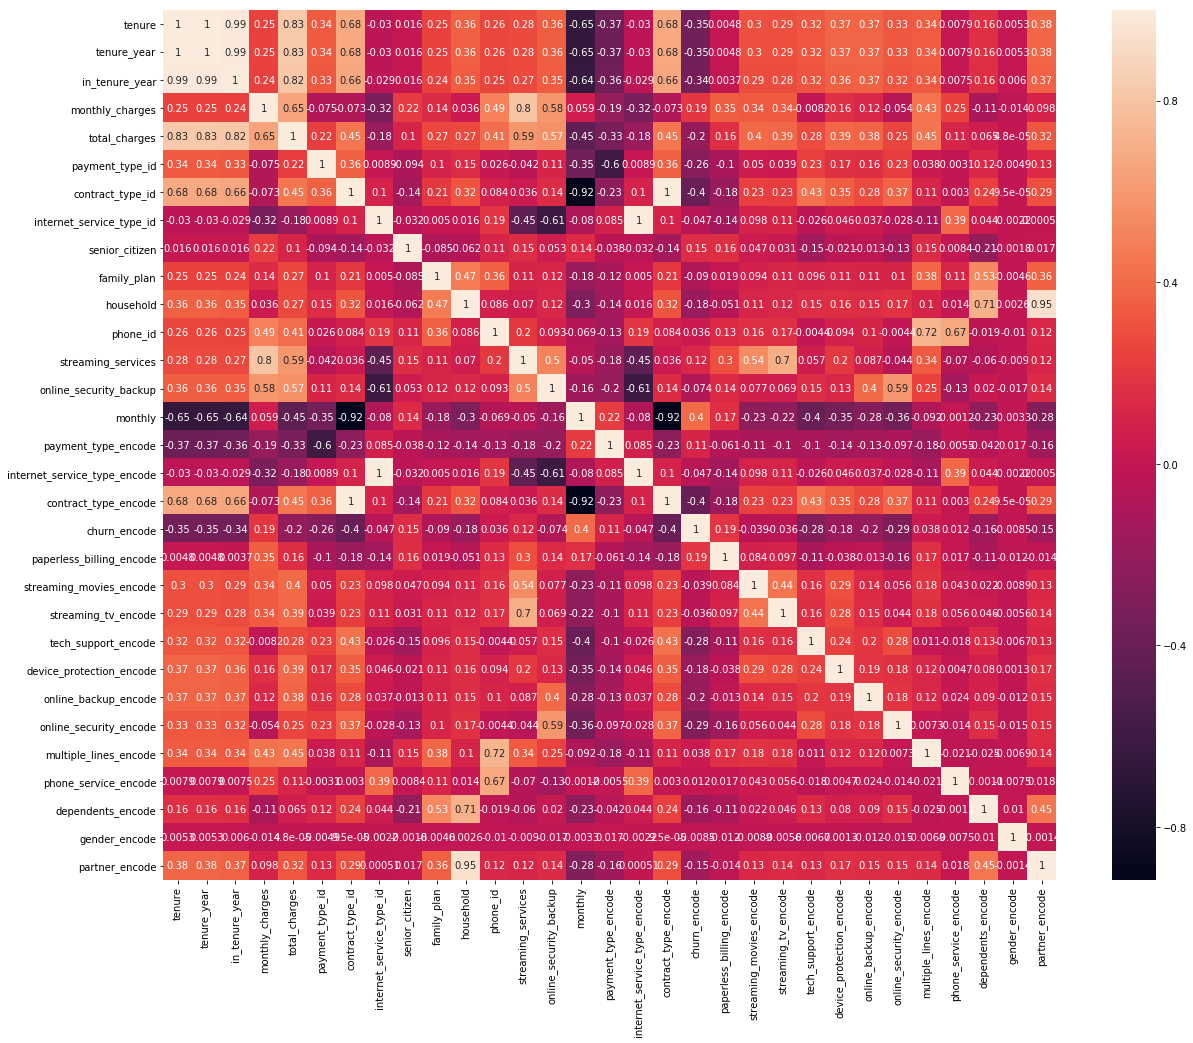

In [52]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True)

#### Once again, month to month jumps out as being the largest group based on contracts within out fiber users without online security.

In [53]:
df_encoded.groupby(['internet_service_type', 'online_security', 'contract_type'])['contract_type'].count()

internet_service_type  online_security      contract_type 
DSL                    No                   Month-to-month     857
                                            One year           240
                                            Two year           143
                       Yes                  Month-to-month     366
                                            One year           330
                                            Two year           480
Fiber optic            No                   Month-to-month    1774
                                            One year           317
                                            Two year           166
                       Yes                  Month-to-month     354
                                            One year           222
                                            Two year           263
None                   No internet service  Month-to-month     524
                                            One year           363
   

##### Online Backup

In [54]:
df_encoded[['online_security_encode', 'tech_support_encode', 'device_protection_encode', 'online_backup_encode']].corr()

,online_security_encode,tech_support_encode,device_protection_encode,online_backup_encode
online_security_encode,1.000000,0.284875,0.175789,0.184942
tech_support_encode,0.284875,1.000000,0.240476,0.195581
device_protection_encode,0.175789,0.240476,1.000000,0.187646
online_backup_encode,0.184942,0.195581,0.187646,1.000000


In [55]:
df_encoded.groupby(['internet_service_type', 'online_backup'])['online_backup_encode'].count()

internet_service_type  online_backup      
DSL                    No                     1334
                       Yes                    1082
Fiber optic            No                     1753
                       Yes                    1343
None                   No internet service    1520
Name: online_backup_encode, dtype: int64

In [56]:
fiber_no_backup = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_backup == 'No')]
fiber_with_backup = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_backup == 'Yes')]

print(fiber_no_backup.churn_encode.mean())
print(fiber_with_backup.churn_encode.mean())

ttest_ind(fiber_no_backup.churn_encode, fiber_with_backup.churn_encode)

0.5077010838562465
0.30305286671630677


Ttest_indResult(statistic=11.683880626204676, pvalue=6.799474455449945e-31)

##### Device Protection

In [57]:
df_encoded.groupby('internet_service_type')['device_protection_encode'].mean()

internet_service_type
DSL            0.878311
Fiber optic    0.876615
None           1.000000
Name: device_protection_encode, dtype: float64

In [58]:
df_encoded.groupby(['internet_service_type', 'device_protection'])['device_protection'].count()

internet_service_type  device_protection  
DSL                    No                     1355
                       Yes                    1061
Fiber optic            No                     1739
                       Yes                    1357
None                   No internet service    1520
Name: device_protection, dtype: int64

In [59]:
fiber_no_protection = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.device_protection == 'No')]
fiber_with_protection = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.device_protection == 'Yes')]

print(fiber_no_protection.churn_encode.mean())
print(fiber_with_protection.churn_encode.mean())

ttest_ind(fiber_no_protection.churn_encode, fiber_with_protection.churn_encode)



0.4997124784358827
0.3154016212232867


Ttest_indResult(statistic=10.491964914685964, pvalue=2.4907995587524844e-25)

### All "security" variables seem to play a role on churn rate.

#### Looking at the family_plan variable and exploring the data related to it

In [60]:
df_encoded.groupby('family_plan')['churn_encode'].mean()

family_plan
0    0.279466
1    0.150336
Name: churn_encode, dtype: float64

In [61]:
family_plans = df[df_encoded.family_plan == 1]
all_not_family_plans = df[df_encoded.family_plan == 0]

ttest_ind(family_plans.churn_encode, all_not_family_plans.churn_encode)

Ttest_indResult(statistic=-7.5737959751407065, pvalue=4.088569005293111e-14)

##### Those customers we believe are on a family plan look to be churning less. Those not on a family plan have a 28% churn rate and those on one have a 15% churn rate.

Are there customers that can be on a family plan and are not? This would mean they have a partner and dependents but do not have multiple lines. If so, do they churn at a higher rate than those on a family plan?

In [62]:
part_n_dep = df_encoded.loc[(df.partner == 'Yes') 
               & (df.dependents == 'Yes') 
               & (df.multiple_lines == 'No')]

print(part_n_dep.churn_encode.mean())

ttest_ind(part_n_dep.churn_encode, family_plans.churn_encode)

0.1437125748502994


Ttest_indResult(statistic=-0.37107299548702766, pvalue=0.7106329742692399)

##### At 14% churn rate, there is not a significant difference between the two groups.

What if we expand the criteria? Are there customers that have a partner **OR** dependents that do not have multiple lines? Do they churn at a higher rate?

In [63]:
part_or_dep = df_encoded.loc[((df.partner == 'Yes') 
               | (df.dependents == 'Yes')) 
               & (df.multiple_lines == 'No')]

print(part_or_dep.churn_encode.mean())

ttest_ind(part_or_dep.churn_encode, family_plans.churn_encode)

0.17861557478368356


Ttest_indResult(statistic=1.7019210530311428, pvalue=0.08890181862351523)

##### 18% churn rate for those with partners or dependents but only one line. Not a significant difference. 
The overall difference between family plan customers and everyone else does not seem to be caused by "missed opportunities" for those who could potentially be on a family plan. This subset of customers is still churning less. Possibly paying less per line and thus feel like they are getting more value?

#### Looking at the family_plan variable and exploring the data related to it

In [64]:
df_encoded.groupby('family_plan')['churn_encode'].mean()

family_plan
0    0.279466
1    0.150336
Name: churn_encode, dtype: float64

In [65]:
family_plans = df[df_encoded.family_plan == 1]
all_not_family_plans = df[df_encoded.family_plan == 0]

ttest_ind(family_plans.churn_encode, all_not_family_plans.churn_encode)

Ttest_indResult(statistic=-7.5737959751407065, pvalue=4.088569005293111e-14)

##### Those customers we believe are on a family plan look to be churning less. Those not on a family plan have a 28% churn rate and those on one have a 15% churn rate.

Are there customers that can be on a family plan and are not? This would mean they have a partner and dependents but do not have multiple lines. If so, do they churn at a higher rate than those on a family plan?

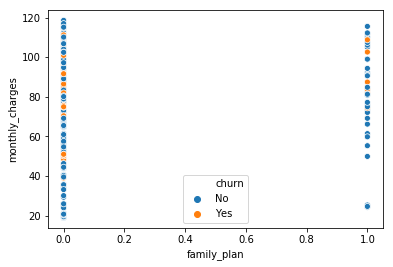

In [66]:
sns.scatterplot(data=df_encoded.sample(500), x='family_plan', y='monthly_charges', hue='churn')

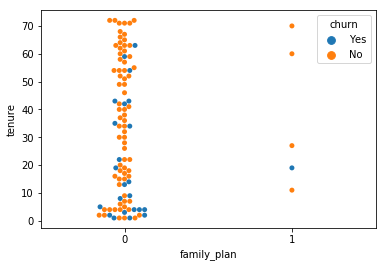

In [67]:
sns.swarmplot(data=df.sample(100), x='family_plan', y='tenure', hue='churn')

## Looking at average monthly charges for those who churn and those who don't

In [68]:
churned = df_encoded[df_encoded.churn_encode == 1]
not_churned = df_encoded[df_encoded.churn_encode == 0]

In [69]:
print(churned.monthly_charges.mean())
print(not_churned.monthly_charges.mean())

ttest_ind(churned.monthly_charges, not_churned.monthly_charges)

74.44133226324234
61.307408483439715


Ttest_indResult(statistic=16.47959313114872, pvalue=6.760843117980302e-60)

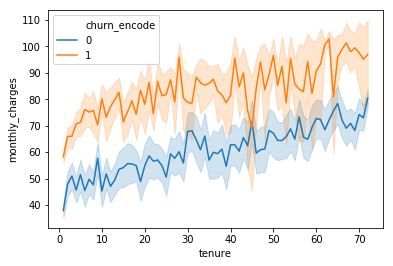

In [70]:
sns.lineplot(data=df_encoded, x='tenure', y='monthly_charges', hue='churn_encode')
plt.show()

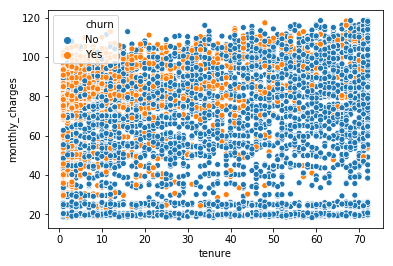

In [71]:
sns.scatterplot(data=df, x='tenure', y='monthly_charges', hue='churn')
plt.show()

# Services

In [72]:
colnames = ['phone_service', 'multiple_lines', 
            'internet_service_type_id','contract_type', 'churn',
           'phone_service_encode', 'multiple_lines_encode',
           'contract_type_encode', 'churn_encode', 'monthly']
df_lines = df[colnames]

In [73]:
df_lines.contract_type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [74]:
df_lines.contract_type = [x.strip().replace(" ", "_") for x in df_lines.contract_type]

In [75]:
df_lines.contract_type.unique()

array(['Month-to-month', 'One_year', 'Two_year'], dtype=object)

In [76]:
x_vars = ['phone_service_encode', 'multiple_lines_encode', 
            'internet_service_type_id','contract_type_encode', 
            'monthly']

X_train, X_test, y_train, y_test = train_test_split(df_lines[x_vars], df_lines['churn_encode'], train_size=0.7, random_state=123)
print('X_train.info():')
print(X_train.info())
print()
print('X_test.info():')
print(X_test.info())
print()
print('y_train.shape = ', y_train.shape)
print()
print('y_test.shape = ', y_test.shape)
print()

X_train.info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 5 columns):
phone_service_encode        4922 non-null int64
multiple_lines_encode       4922 non-null int64
internet_service_type_id    4922 non-null int64
contract_type_encode        4922 non-null int64
monthly                     4922 non-null int64
dtypes: int64(5)
memory usage: 230.7 KB
None

X_test.info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 6829 to 3849
Data columns (total 5 columns):
phone_service_encode        2110 non-null int64
multiple_lines_encode       2110 non-null int64
internet_service_type_id    2110 non-null int64
contract_type_encode        2110 non-null int64
monthly                     2110 non-null int64
dtypes: int64(5)
memory usage: 98.9 KB
None

y_train.shape =  (4922,)

y_test.shape =  (2110,)



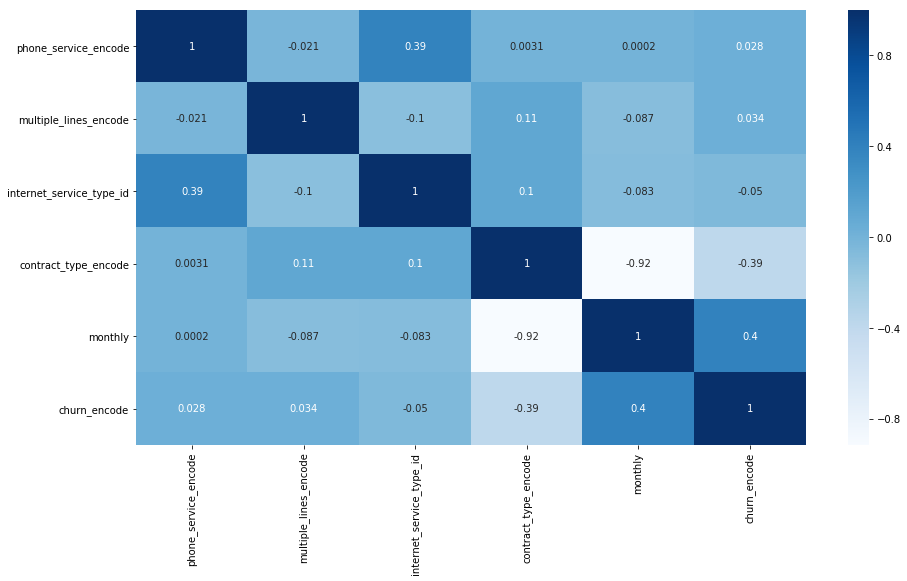

In [77]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), cmap="Blues", annot=True)
plt.show()

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 5 columns):
phone_service_encode        4922 non-null int64
multiple_lines_encode       4922 non-null int64
internet_service_type_id    4922 non-null int64
contract_type_encode        4922 non-null int64
monthly                     4922 non-null int64
dtypes: int64(5)
memory usage: 230.7 KB


In [79]:
X_train.head()

,phone_service_encode,multiple_lines_encode,internet_service_type_id,contract_type_encode,monthly
463,1,0,1,0,1
5822,1,2,3,0,1
1432,1,0,1,1,0
2890,1,2,2,0,1
3911,1,2,2,0,1


In [80]:
def df_print_r_and_p_values(X, y):
    r_and_p_values = {col: stats.pearsonr(X[col], y) for col in X.columns}
    print("PEARSON'S R")
    for k, v in r_and_p_values.items():
        col = k
        r, p = v
        print(f"{col}:")
        print(f"\tPearson's R is {r:.2f} ")
        print(f"\twith a significance p-value of {p: .3}\n")


# Nothing interesting showing up here... 
df_print_r_and_p_values(X_train[x_vars], y_train)

PEARSON'S R
phone_service_encode:
	Pearson's R is 0.03 
	with a significance p-value of  0.0497

multiple_lines_encode:
	Pearson's R is 0.03 
	with a significance p-value of  0.0168

internet_service_type_id:
	Pearson's R is -0.05 
	with a significance p-value of  0.000441

contract_type_encode:
	Pearson's R is -0.39 
	with a significance p-value of  1.17e-178

monthly:
	Pearson's R is 0.40 
	with a significance p-value of  3.02e-187



#### Is the churn rate significantly different for month-to-month contracts vs those with 2-year contracts?

In [81]:
df_train = pd.concat([X_train, y_train], axis=1)

# A t score of 28.7 means the group of two-year contracts is 
# 28.7 standard deviations from the mean of the group with 
# month-to-month contracts.

# - The larger the t statistic, the more difference there is between 
#   the groups, the more likely it is that the results are repeatable, 
#   i.e. that the difference is significant.

# - The smaller the score, the more similarity.

# So this shows that the month-to-month and 2-year contract groups are 
# significantly different from each other. So I need to group the number 
# of contracts with that aggragate. 


# Try various comparisons to see which are most significant.
month_to_month = df_train[df_train.contract_type_encode == 0].churn_encode
two_year = df_train[df_train.contract_type_encode == 2].churn_encode
print(stats.ttest_ind(month_to_month.values, two_year.values))

Ttest_indResult(statistic=26.576791550438063, pvalue=3.998149187664793e-143)


In [82]:
one_year = df_train[df_train.contract_type_encode == 1].churn_encode
print(stats.ttest_ind(month_to_month.values, one_year.values))

Ttest_indResult(statistic=18.70914591334097, pvalue=1.002085969440357e-74)


In [83]:
one_or_two_year = df_train[df_train.contract_type_encode > 0].churn_encode
print(stats.ttest_ind(month_to_month.values, one_or_two_year.values))

Ttest_indResult(statistic=30.496427035202135, pvalue=3.0176369195521845e-187)


In [84]:
print(stats.ttest_ind(one_year.values, two_year.values))

Ttest_indResult(statistic=7.619470317053519, pvalue=3.7396902119779775e-14)


In [85]:
month_or_two = df_train[(df_train.contract_type_encode == 0) | (df_train.contract_type_encode == 2)].churn_encode
print(stats.ttest_ind(one_year.values, month_or_two.values))

Ttest_indResult(statistic=-12.462169734084801, pvalue=4.049974223456634e-35)


In [86]:
month_or_one = df_train[(df_train.contract_type_encode == 0) | (df_train.contract_type_encode == 1)].churn_encode
print(stats.ttest_ind(two_year.values, month_or_one.values))

Ttest_indResult(statistic=-21.781063315898198, pvalue=1.7140169188800316e-100)


# The month-to-month contracts are 30.5 standard deviations from the mean of the group with one- or two-year contracts.

### Try logistic regression on all independent variables

# <span style="color:red">First Model - Logitstic Regression</span>

##### Create the logistic regression object

In [87]:
# from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

##### Fit the model to the training data

In [88]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

##### Print the coefficients and intercept of the model

In [89]:
print('Coefficient: \n', logit.coef_)
print()
print('Intercept: \n', logit.intercept_)
print()

Coefficient: 
 [[ 0.4086848   0.21777786 -0.13696493 -1.36299     0.40528568]]

Intercept: 
 [-0.33149603]



##### Estimate whether or not a customer would churn, using the training data

In [90]:
y_pred1 = logit.predict(X_train)
y_pred1

array([1, 1, 0, ..., 0, 1, 1])

Also need to use this model to predict churn (1=churn, 0=not_churn) of original data file and add that column along with customer_id and probability of churn.

##### Estimate the probability of a customer churning, using the training data

In [91]:
y_pred_proba1 = logit.predict_proba(X_train)
y_pred_proba1

array([[0.41447177, 0.58552823],
       [0.3758653 , 0.6241347 ],
       [0.8057717 , 0.1942283 ],
       ...,
       [0.8057717 , 0.1942283 ],
       [0.34432025, 0.65567975],
       [0.34432025, 0.65567975]])

In [92]:
# df1.merge(df2, left_on='lkey', right_on='rkey')

y_pred_df1 = pd.DataFrame(y_pred1)
y_pred_df1.head()

,0
0,1
1,1
2,0
3,1
4,1


In [93]:
y_pred_proba_df1 = pd.DataFrame(y_pred_proba1)
y_pred_proba_df1.head()


# pd.DataFrame(data=data[1:,1:],    # values
# ...              index=data[1:,0],    # 1st column as index
# ...              columns=data[0,1:]) 

,0,1
0,0.414472,0.585528
1,0.375865,0.624135
2,0.805772,0.194228
3,0.344320,0.655680
4,0.344320,0.655680


#### Evaluate Model
##### Compute the accuracy

In [94]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.65


In [95]:
logit.score(X_train, y_train)
# at 70% split, 0.6529865908167412

0.6529865908167412

##### Create a confusion matrix

In [96]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred1),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,2075,1550
Actual +,158,1139


##### Compute Precision, Recall, F1-score, and Support

In [97]:
tp = confusion_df.loc['Actual +', 'Pred +']
fn = confusion_df.loc['Actual +', 'Pred -']
fp = confusion_df.loc['Actual -', 'Pred +']
tn = confusion_df.loc['Actual -', 'Pred -']

recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (recall + precision) / 2
support = tp + fn

print('recall:    %.2f' % recall)
print('precision: %.2f' % precision)
print('f1:        %.2f' % f1)
print('support:   %4d' % support)

recall:    0.88
precision: 0.42
f1:        0.65
support:   1297


In [98]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      3625
           1       0.42      0.88      0.57      1297

   micro avg       0.65      0.65      0.65      4922
   macro avg       0.68      0.73      0.64      4922
weighted avg       0.80      0.65      0.67      4922



#### Test Model
##### Compute the accuracy of the model when run on the test data

In [99]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.66


#### Visualize Model

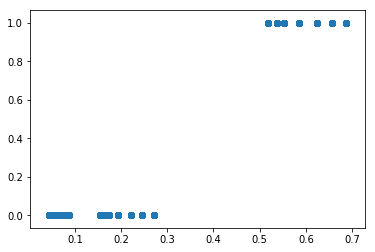

In [100]:
## verify
y_pred_proba1 = [i[1] for i in y_pred_proba1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba1, y_pred1)

##### I was getting identical results when running with all the dependent variables as I did when running it with only the monthly column, so I tried changing the percentage of test/train split. My accuracy should have gone down, but it went slightly up. And the accuracies between the two models stayed identical. ????

#### Try logistic regression on only 
#### data grouped into month-to-month vs one or two-year contracts.

# <span style="color:red">Second Model - Logitstic Regression</span>

In [101]:
month_to_month = df_train[df_train.contract_type_encode == 0].churn_encode
one_or_two_year = df_train[df_train.contract_type_encode > 0].churn_encode
print(stats.ttest_ind(month_to_month.values, one_or_two_year.values))

Ttest_indResult(statistic=30.496427035202135, pvalue=3.0176369195521845e-187)


In [102]:
month_train = X_train[['monthly']]
month_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 1 columns):
monthly    4922 non-null int64
dtypes: int64(1)
memory usage: 76.9 KB


#### The probabilities are identical, so checking another variable...
##### just phone_service against churn

In [103]:
logit2 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
print(logit2.fit(month_train, y_train))
print('Coefficient: \n', logit2.coef_)
print()
print('Intercept: \n', logit2.intercept_)

y_pred2 = logit2.predict(month_train)
y_pred_proba2 = logit2.predict_proba(month_train)
X_train['prediction'] = logit2.predict(month_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Coefficient: 
 [[2.25616013]]

Intercept: 
 [-1.87388411]


In [104]:
logit2.score(X_train[['monthly']], y_train)

0.6529865908167412

In [105]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred2),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,2075,1550
Actual +,158,1139


In [106]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      3625
           1       0.42      0.88      0.57      1297

   micro avg       0.65      0.65      0.65      4922
   macro avg       0.68      0.73      0.64      4922
weighted avg       0.80      0.65      0.67      4922



#### The probabilities are identical, so checking another variable...
##### just phone_service against churn

# <span style="color:red">Third Model - Logitstic Regression</span>

In [107]:
phone_train = X_train[['phone_service_encode']]
phone_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 1 columns):
phone_service_encode    4922 non-null int64
dtypes: int64(1)
memory usage: 76.9 KB


In [108]:
logit3 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
print(logit3.fit(phone_train, y_train))
print('Coefficient: \n', logit3.coef_)
print()
print('Intercept: \n', logit3.intercept_)

y_pred3 = logit3.predict(phone_train)
y_pred_proba3 = logit3.predict_proba(phone_train)
X_train['prediction'] = logit3.predict(phone_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Coefficient: 
 [[0.22250055]]

Intercept: 
 [-0.53659501]


In [109]:
logit3.score(X_train[['phone_service_encode']], y_train)

0.7364892320195042

In [110]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred3),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,3625,0
Actual +,1297,0


In [111]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3625
           1       0.00      0.00      0.00      1297

   micro avg       0.74      0.74      0.74      4922
   macro avg       0.37      0.50      0.42      4922
weighted avg       0.54      0.74      0.62      4922



/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### The accuracy for a logistic regression including only phone_service was different, but it also got more accurate as I decreased the percentage of data that went to test. That should not happen. ????

# <span style="color:red">Fourth Model - Logitstic Regression</span>

#### multiple_lines against churn

In [112]:
multiple_lines_train = X_train[['multiple_lines_encode']]
print(multiple_lines_train.info())

logit4 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
print(logit4.fit(multiple_lines_train, y_train))
print('Coefficient: \n', logit4.coef_)
print()
print('Intercept: \n', logit4.intercept_)

y_pred4 = logit4.predict(multiple_lines_train)
y_pred_proba4 = logit4.predict_proba(multiple_lines_train)
X_train['prediction'] = logit4.predict(multiple_lines_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 1 columns):
multiple_lines_encode    4922 non-null int64
dtypes: int64(1)
memory usage: 76.9 KB
None
LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Coefficient: 
 [[0.08112722]]

Intercept: 
 [-0.41226772]


In [113]:
logit4.score(X_train[['multiple_lines_encode']], y_train)

0.7364892320195042

In [114]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred4),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,3625,0
Actual +,1297,0


In [115]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3625
           1       0.00      0.00      0.00      1297

   micro avg       0.74      0.74      0.74      4922
   macro avg       0.37      0.50      0.42      4922
weighted avg       0.54      0.74      0.62      4922



/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# <span style="color:red">Fifth Model - Logitstic Regression</span>

#### internet_service_type_id against churn

In [116]:
internet_service_type_id_train = X_train[['internet_service_type_id']]
print(internet_service_type_id_train.info())

logit5 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
print(logit5.fit(internet_service_type_id_train, y_train))
print('Coefficient: \n', logit5.coef_)
print()
print('Intercept: \n', logit5.intercept_)

y_pred5 = logit5.predict(internet_service_type_id_train)
y_pred_proba5 = logit5.predict_proba(internet_service_type_id_train)
X_train['prediction'] = logit5.predict(internet_service_type_id_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 1 columns):
internet_service_type_id    4922 non-null int64
dtypes: int64(1)
memory usage: 76.9 KB
None
LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Coefficient: 
 [[-0.17293487]]

Intercept: 
 [-0.01435485]


In [117]:
logit5.score(X_train[['internet_service_type_id']], y_train)

0.7364892320195042

In [118]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred5),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,3625,0
Actual +,1297,0


In [119]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3625
           1       0.00      0.00      0.00      1297

   micro avg       0.74      0.74      0.74      4922
   macro avg       0.37      0.50      0.42      4922
weighted avg       0.54      0.74      0.62      4922



/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# <span style="color:red">Sixth Model - Logitstic Regression</span>

#### contract_type against churn

In [120]:
contract_type_train = X_train[['contract_type_encode']]
print(contract_type_train.info())


logit6 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
print(logit6.fit(contract_type_train, y_train))
print('Coefficient: \n', logit6.coef_)
print()
print('Intercept: \n', logit6.intercept_)

y_pred6 = logit6.predict(contract_type_train)
y_pred_proba6 = logit6.predict_proba(contract_type_train)
X_train['prediction'] = logit6.predict(contract_type_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 1 columns):
contract_type_encode    4922 non-null int64
dtypes: int64(1)
memory usage: 76.9 KB
None
LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Coefficient: 
 [[-1.60936379]]

Intercept: 
 [0.37192571]


In [121]:
logit6.score(X_train[['contract_type_encode']], y_train)

0.6529865908167412

In [122]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred6),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,2075,1550
Actual +,158,1139


In [123]:
print(classification_report(y_train, y_pred6))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      3625
           1       0.42      0.88      0.57      1297

   micro avg       0.65      0.65      0.65      4922
   macro avg       0.68      0.73      0.64      4922
weighted avg       0.80      0.65      0.67      4922



# <span style="color:red">Seventh Model - Decision Tree</span>

In [124]:
clf7 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3, random_state=123, max_features=5)

# Fit the model to the training data
clf7.fit(X_train, y_train)

# Estimate churn
y_pred7 = clf7.predict(X_train)
print('y_pred: ', y_pred7)
print('y_pred has ', len(y_pred7), ' entries.')

y_pred_proba7 = clf7.predict_proba(X_train)
print('y_pred_proba: ')
print(y_pred_proba7)
print("y_pred_proba's shape: ", y_pred_proba7.shape)

# Compute the Accuracy: 
#   number of correct predictions 
#   over the number of total instances that have been evaluated.
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf7.score(X_train, y_train)))

# Create the confusion matrix
# Zach gave us this with X_train.prediction, but I'm pretty sure 
# I'm supposed to use y_pred, not X_train.prediction because I did not
# create a prediction column in this model.
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred7),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

y_pred:  [0 0 0 ... 0 1 1]
y_pred has  4922  entries.
y_pred_proba: 
[[0.68347011 0.31652989]
 [0.92105263 0.07894737]
 [0.85312899 0.14687101]
 ...
 [0.85312899 0.14687101]
 [0.45565335 0.54434665]
 [0.45565335 0.54434665]]
y_pred_proba's shape:  (4922, 2)
Accuracy of Decision Tree classifier on training set: 0.76


,Pred -,Pred +
Actual -,2952,673
Actual +,493,804


#### Better Confusion Matrix

In [125]:
predictions = clf7.predict(X_train)

confusion_matrix(y_train, predictions)

array([[2952,  673],
       [ 493,  804]])

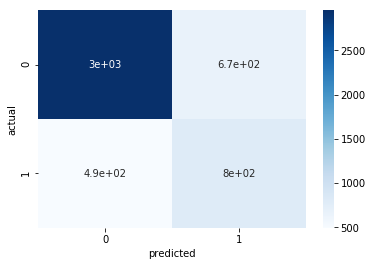

In [126]:
train = X_train.assign(actual=y_train, predicted=predictions)
cm = pd.crosstab(train.actual, train.predicted)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

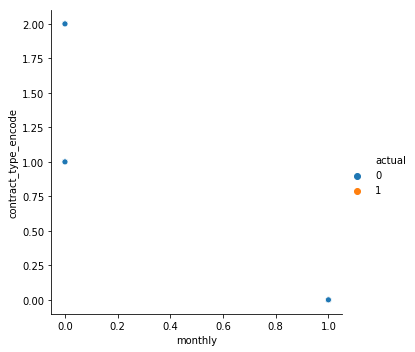

In [127]:
# options: 'phone_service', 'multiple_lines', 'internet_service_type_id', 'contract_type', 'monthly'
sns.relplot(data=train, x='monthly', y='contract_type_encode', hue='actual')
plt.show()

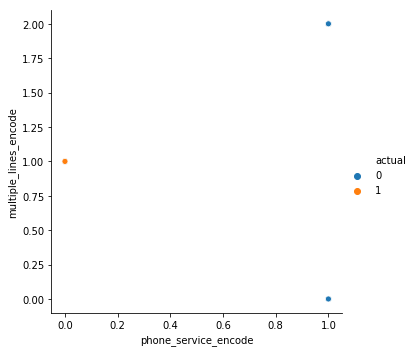

In [128]:
# options: 'phone_service', 'multiple_lines', 'internet_service_type_id', 'contract_type', 'monthly'
sns.relplot(data=train, x='phone_service_encode', y='multiple_lines_encode', hue='actual')
plt.show()

#### Create a classificaiton report
- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- Support: number of occurrences of each class in where y is true.

In [129]:
print(classification_report(y_train, y_pred7))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      3625
           1       0.54      0.62      0.58      1297

   micro avg       0.76      0.76      0.76      4922
   macro avg       0.70      0.72      0.71      4922
weighted avg       0.77      0.76      0.77      4922



#### Test Model
##### Compute the accuracy of the model when run on the test data

In [130]:
X_test.head(3)

,phone_service_encode,multiple_lines_encode,internet_service_type_id,contract_type_encode,monthly
6829,1,0,3,2,0
364,1,0,1,0,1
2066,1,2,1,2,0


In [131]:
y_test.head(3)

6829    0
364     1
2066    0
Name: churn_encode, dtype: int64

In [132]:
# print('Accuracy of Decision Tree classifier on test set: {:.2f}'
#      .format(clf7.score(X_test, y_test)))

In [133]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = X_train.columns
class_names = ['0', '1']

dot = export_graphviz(
    clf7,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names, # target value names
    special_characters=True,
    filled=True,             # fill nodes w/ informative colors
    impurity=False,          # show impurity at each node
    leaves_parallel=True,    # all leaves at the bottom
    proportion=True,         # show percentages instead of numbers at each leaf
    rotate=True,             # left to right instead of top-bottom
    rounded=True,            # rounded boxes and sans-serif font
)

graph = graphviz.Source(dot, filename='churn_decision_tree2', format='png')
graph.view(cleanup=True)

'churn_decision_tree2.png'

In [134]:
![title](img/churn_decision_tree2.png)

/bin/sh: -c: line 0: syntax error near unexpected token `img/churn_decision_tree2.png'
/bin/sh: -c: line 0: `[title](img/churn_decision_tree2.png)'


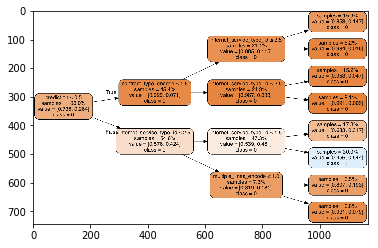

In [135]:
image = mpimg.imread("churn_decision_tree2.png")
plt.imshow(image)
plt.show()

# Shows that contract_type = month-to-month and internet_service = fiber optic are the most likely to churn.
           

### Try Decision Tree with only contract_type... using only one independent variable does not work for decision tree...
### Try Decision Tree dropping monthly, keeping rest...

In [136]:
# phone_service, multiple_lines, internet_service_type_id, 
# contract_type, monthly
pmic_train = X_train[['phone_service_encode', 'multiple_lines_encode', 'internet_service_type_id', 'contract_type_encode']]
pmic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 463 to 3587
Data columns (total 4 columns):
phone_service_encode        4922 non-null int64
multiple_lines_encode       4922 non-null int64
internet_service_type_id    4922 non-null int64
contract_type_encode        4922 non-null int64
dtypes: int64(4)
memory usage: 192.3 KB


In [137]:
# for classificaiton you can change the algorithm as gini or entropy 
# (information gain).  Default is gini. Other option is entropy.
# Create the Decision Tree Object
clf8 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)

# Fit the model to the training data
clf8.fit(pmic_train, y_train)

# Estimate churn
y_pred8 = clf8.predict(pmic_train)
print('y_pred: ', y_pred8)
print('y_pred has ', len(y_pred8), ' entries.')

y_pred_proba8 = clf8.predict_proba(pmic_train)
print('y_pred_proba: ')
print(y_pred_proba8)
print("y_pred_proba's shape: ", y_pred_proba8.shape)

# Compute the Accuracy: 
#   number of correct predictions 
#   over the number of total instances that have been evaluated.
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf8.score(pmic_train, y_train)))

# Create the confusion matrix
# Zach gave us this with X_train.prediction, but I'm pretty sure 
# I'm supposed to use y_pred, not X_train.prediction because I did not
# create a prediction column in this model.
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred8),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

y_pred:  [0 0 0 ... 0 1 1]
y_pred has  4922  entries.
y_pred_proba: 
[[0.68347011 0.31652989]
 [0.92105263 0.07894737]
 [0.85312899 0.14687101]
 ...
 [0.85312899 0.14687101]
 [0.45565335 0.54434665]
 [0.45565335 0.54434665]]
y_pred_proba's shape:  (4922, 2)
Accuracy of Decision Tree classifier on training set: 0.76


,Pred -,Pred +
Actual -,2952,673
Actual +,493,804


#### Create a classificaton report
- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- Support: number of occurrences of each class in where y is true.

In [138]:
print(classification_report(y_train, y_pred8))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      3625
           1       0.54      0.62      0.58      1297

   micro avg       0.76      0.76      0.76      4922
   macro avg       0.70      0.72      0.71      4922
weighted avg       0.77      0.76      0.77      4922



#### Test Model
##### Compute the accuracy of the model when run on the test data

In [139]:
pmic_test = X_test[['phone_service_encode', 'multiple_lines_encode', 'internet_service_type_id', 'contract_type_encode']]

In [140]:
clf8.score(pmic_test, y_test)

0.7597156398104266

In [141]:
feature_names = pmic_test.columns
class_names = ['0', '1']

dot = export_graphviz(
    clf8,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names, # target value names
    special_characters=True,
    filled=True,             # fill nodes w/ informative colors
    impurity=False,          # show impurity at each node
    leaves_parallel=True,    # all leaves at the bottom
    proportion=True,         # show percentages instead of numbers at each leaf
    rotate=True,             # left to right instead of top-bottom
    rounded=True,            # rounded boxes and sans-serif font
)

graph = graphviz.Source(dot, filename='churn_decision_tree2', format='png')
graph.view(cleanup=True)

'churn_decision_tree2.png'

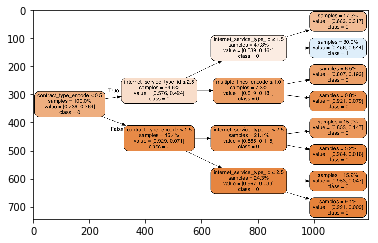

In [142]:
image = mpimg.imread("churn_decision_tree2.png")
plt.imshow(image)
plt.show()

# Same results, so separating out a boolean monthly column was not necessary for the decision tree model.

### Random Forest
#### Train Model
##### Create the Random Forest Object

In [143]:
rf9 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

##### Fit the model to the training data

In [144]:
rf9.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

##### Print Feature Importances

In [145]:
print(rf9.feature_importances_)

[0.0056844  0.0174146  0.16629236 0.26081626 0.29471409 0.25507828]


##### Estimate whether or not a customer would churn, using the training data

In [146]:
y_pred9 = rf9.predict(X_train)

##### Estimate the probability of a customer churning, using the training data

In [147]:
y_pred_proba9 = rf9.predict_proba(X_train)

#### Evaluate Model
##### Compute the Accuracy

In [148]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf9.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


##### Create a confusion matrix

In [149]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred9),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,3242,383
Actual +,838,459


##### Create a classificaiton report
- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- Support: number of occurrences of each class in where y is true.

In [150]:
print(classification_report(y_train, y_pred9))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      3625
           1       0.55      0.35      0.43      1297

   micro avg       0.75      0.75      0.75      4922
   macro avg       0.67      0.62      0.64      4922
weighted avg       0.73      0.75      0.73      4922



#### Test Model
##### Compute the accuracy of the model when run on the test data

In [151]:
# print('Accuracy of random forest classifier on test set: {:.2f}'
#      .format(rf9.score(X_test, y_test)))

### K-Nearest Neighbor

#### Train Model
##### Create KNN Object

In [152]:
# weights = ['uniform', 'density']
knn10 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

##### Fit the model to the training data

In [153]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

##### Estimate whether or not a customer would churn, using the training data

In [154]:
y_pred10 = knn10.predict(X_train)

##### Estimate the probability of a customer churning, using the training data

In [155]:
y_pred_proba10 = knn10.predict_proba(X_train)

#### Evaluate Model
##### Compute the accuracy

In [156]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


##### Create a confusion matrix

In [157]:
confusion_df = pd.DataFrame(confusion_matrix(y_train, y_pred10),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

confusion_df

,Pred -,Pred +
Actual -,3625,0
Actual +,1297,0


##### Compute Precision, Recall, F1-score, and Support
- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- Support: number of occurrences of each class in where y is true.

In [158]:
print(classification_report(y_train, y_pred10))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3625
           1       0.00      0.00      0.00      1297

   micro avg       0.74      0.74      0.74      4922
   macro avg       0.37      0.50      0.42      4922
weighted avg       0.54      0.74      0.62      4922



/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Test Model
##### Compute the accuracy of the model when run on the test data

In [159]:
# print('Accuracy of KNN classifier on test set: {:.2f}'
#      .format(knn10.score(X_test, y_test)))

#### Visualize Model

In [160]:
# import matplotlib.pyplot as plt
# k_range = range(1, 20)
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn10.fit(X_train, y_train)
#     scores.append(knn.score(X_test, y_test))
# plt.figure()
# plt.xlabel('k')
# plt.ylabel('accuracy')
# plt.scatter(k_range, scores)
# plt.xticks([0,5,10,15,20])

# <span style="color:red">Further Methods of Exploration</span>

In [161]:
def split_it(df, training_size=.7, random=123, strat=None):
    """Train test split. Returns train_df and test_df."""
    train, test = train_test_split(df, train_size=training_size, random_state=random, stratify=strat)
    print('Parameters are df, train_size, random_state, and stratify')
    print('Returns train, test')
    return train, test

def min_max(train, list_of_what_to_standardize):
    """Min-max normalization that returns a train_df and the scaler used."""
    scaler = MinMaxScaler()
    scaler.fit(train[list_of_what_to_standardize])
    train[list_of_what_to_standardize] = scaler.transform(train[list_of_what_to_standardize])
    print('Parameters are a training df and a list of what columns to standardize.')
    print('Returns the normalized training df and the scaler for scaling the test set.')
    return train, scaler

In [162]:
train

,phone_service_encode,multiple_lines_encode,internet_service_type_id,contract_type_encode,monthly,prediction,actual,predicted
463,1,0,1,0,1,1,1,0
5822,1,2,3,0,1,1,0,0
1432,1,0,1,1,0,0,0,0
2890,1,2,2,0,1,1,0,1
3911,1,2,2,0,1,1,1,1
2003,0,1,1,2,0,0,0,0
4935,1,2,2,1,0,0,1,0
1588,1,0,1,1,0,0,0,0
6718,1,0,3,2,0,0,0,0
5198,1,0,2,2,0,0,0,0


In [163]:
df_encoded['total_charges'] = df_encoded.total_charges.astype(float)

In [166]:
train, test = split_it(df_encoded)

Parameters are df, train_size, random_state, and stratify
Returns train, test


In [167]:
train, scaler = min_max(train, ['tenure', 'monthly_charges', 'total_charges'])

Parameters are a training df and a list of what columns to standardize.
Returns the normalized training df and the scaler for scaling the test set.


/Users/codywatson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [168]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [169]:
test[['tenure', 'monthly_charges', 'total_charges']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])



In [170]:
train[['tenure', 'total_charges', 'monthly_charges']].describe()

,tenure,total_charges,monthly_charges
count,4922.000000,4922.000000,4922.000000
mean,0.444718,0.262490,0.463658
std,0.344407,0.261376,0.299267
min,0.000000,0.000000,0.000000
25%,0.112676,0.045348,0.174129
50%,0.408451,0.161611,0.518905
75%,0.760563,0.438595,0.712935
max,1.000000,1.000000,1.000000


#### Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

Text(0.5, 1.0, 'Average Churn Rate vs. Tenure')

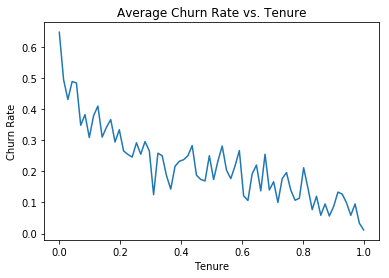

In [171]:
sns.lineplot(data=train.groupby('tenure')['churn_encode'].mean())
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Average Churn Rate vs. Tenure')

#### Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

The overall churn rate is 27%. Senior citizens churn at a rate of 44%. Month to month customers churn at a rate of 43%. Users of fiber optic churn at a rate of 42%, and of those with fiber, majority of the churning happens with customers who don't have utilize 'security' options. 

#### Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

##### Phone only

In [172]:
df_encoded.groupby('internet_service_type')['internet_service_type'].count()

internet_service_type
DSL            2416
Fiber optic    3096
None           1520
Name: internet_service_type, dtype: int64

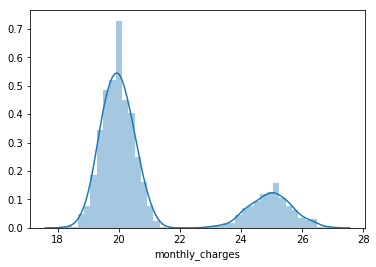

In [173]:
sns.distplot(df_encoded.loc[df_encoded.internet_service_type_encode == 2].monthly_charges)


In [174]:
bins = [i for i in range(18, 27)]
all_phone_binned = pd.cut(df_encoded.loc[df_encoded.internet_service_type_encode == 2].monthly_charges, bins)
a = pd.DataFrame(all_phone_binned)

In [175]:
a['churn'] = df_encoded.loc[df_encoded.internet_service_type_encode == 2].churn_encode

In [176]:
a.monthly_charges.iloc[0]

Interval(19, 20, closed='right')

In [177]:
a.groupby('monthly_charges')['churn'].mean()

monthly_charges
(18, 19]    0.090909
(19, 20]    0.088710
(20, 21]    0.086785
(21, 22]    0.050000
(22, 23]    0.000000
(23, 24]    0.035714
(24, 25]    0.032895
(25, 26]    0.029412
Name: churn, dtype: float64

##### DSL only

In [178]:
df_encoded.loc[(df_encoded.internet_service_type == 'DSL') & (df_encoded.phone_service == 'No')].describe()

,tenure,tenure_year,in_tenure_year,monthly_charges,total_charges,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,family_plan,...,streaming_tv_encode,tech_support_encode,device_protection_encode,online_backup_encode,online_security_encode,multiple_lines_encode,phone_service_encode,dependents_encode,gender_encode,partner_encode
count,680.000000,680.000000,680.000000,680.00000,680.000000,680.000000,680.000000,680.0,680.000000,680.0,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.0,680.0,680.000000,680.000000,680.000000
mean,31.830882,2.652162,3.136765,41.99250,1500.433749,2.326471,1.680882,1.0,0.152941,0.0,...,0.832353,0.844118,0.891176,0.841176,0.826471,1.0,0.0,0.300000,0.516176,0.454412
std,24.207484,2.017600,1.899648,11.41653,1341.202780,1.156096,0.828213,0.0,0.360196,0.0,...,0.986573,0.988503,0.994793,0.988034,0.985554,0.0,0.0,0.458595,0.500106,0.498284
min,1.000000,0.080000,1.000000,23.45000,23.450001,1.000000,1.000000,1.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,8.000000,0.670000,1.000000,33.60000,298.962494,1.000000,1.000000,1.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
50%,29.000000,2.420000,3.000000,40.55000,1153.800049,2.000000,1.000000,1.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000
75%,53.000000,4.420000,5.000000,50.66250,2465.175049,3.000000,2.000000,1.0,0.000000,0.0,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,0.0,1.000000,1.000000,1.000000
max,72.000000,6.000000,6.000000,67.20000,4919.700195,4.000000,3.000000,1.0,1.000000,0.0,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,0.0,1.000000,1.000000,1.000000


In [179]:
bins = [i for i in range(23, 68, 5)]
all_phone_binned = pd.cut(df_encoded.loc[(df_encoded.internet_service_type == 'DSL') & (df_encoded.phone_service == 'No')].monthly_charges, bins)
d = pd.DataFrame(all_phone_binned)
d['churn'] = df_encoded.loc[(df_encoded.internet_service_type == 'DSL') & (df_encoded.phone_service == 'No')].churn_encode

In [180]:
d.groupby('monthly_charges')['churn'].mean()

monthly_charges
(23, 28]    0.437500
(28, 33]    0.333333
(33, 38]    0.276190
(38, 43]    0.255102
(43, 48]    0.229885
(48, 53]    0.211765
(53, 58]    0.151515
(58, 63]    0.100000
Name: churn, dtype: float64

#### Fiber

In [181]:
df_encoded.loc[(df_encoded.internet_service_type == 'Fiber optic') & (df_encoded.multiple_lines == 'No')].describe()


,tenure,tenure_year,in_tenure_year,monthly_charges,total_charges,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,family_plan,...,streaming_tv_encode,tech_support_encode,device_protection_encode,online_backup_encode,online_security_encode,multiple_lines_encode,phone_service_encode,dependents_encode,gender_encode,partner_encode
count,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.0,1158.000000,1158.0,...,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.0,1158.0,1158.000000,1158.000000,1158.000000
mean,21.389465,1.782133,2.345423,84.580570,1933.581822,1.932642,1.280656,2.0,0.227116,0.0,...,0.905009,0.466321,0.677029,0.652850,0.438687,0.0,1.0,0.203800,0.491364,0.392919
std,20.863663,1.739024,1.636297,11.307584,2026.517060,1.162935,0.580426,0.0,0.419149,0.0,...,0.995908,0.846053,0.946818,0.938215,0.827961,0.0,0.0,0.402996,0.500141,0.488610
min,1.000000,0.080000,1.000000,67.750000,68.500000,1.000000,1.000000,2.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
25%,3.000000,0.250000,1.000000,74.612500,261.087494,1.000000,1.000000,2.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
50%,14.000000,1.170000,2.000000,83.825000,1150.600037,1.000000,1.000000,2.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
75%,34.000000,2.830000,3.000000,94.187500,3026.699951,3.000000,1.000000,2.0,0.000000,0.0,...,2.000000,0.000000,2.000000,2.000000,0.000000,0.0,1.0,0.000000,1.000000,1.000000
max,72.000000,6.000000,6.000000,112.200000,8033.100098,4.000000,3.000000,2.0,1.000000,0.0,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,1.0,1.000000,1.000000,1.000000


In [182]:
bins = [i for i in range(67, 113, 5)]
all_phone_binned = pd.cut(df_encoded.loc[(df_encoded.internet_service_type == 'Fiber optic') & (df_encoded.multiple_lines == 'No')].monthly_charges, bins)
f = pd.DataFrame(all_phone_binned)
f['churn'] = df_encoded.loc[(df_encoded.internet_service_type == 'Fiber optic') & (df_encoded.multiple_lines == 'No')].churn_encode


In [183]:
f.groupby('monthly_charges')['churn'].mean()

monthly_charges
(67, 72]      0.594828
(72, 77]      0.455882
(77, 82]      0.571429
(82, 87]      0.432000
(87, 92]      0.424837
(92, 97]      0.392857
(97, 102]     0.282828
(102, 107]    0.258065
(107, 112]    0.190476
Name: churn, dtype: float64

There doesn't seem to be a price threshold that causes people to churn. In fact, most people churn at lower prices, meaning that price isn't a big factor. It does make sense though since lower prices are found at earlier tenures, meaning that people churn early. Those churning early are likely on MtM.

#### If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

In [184]:
print(f'Churn rate for MtM at 12 months: {df_encoded.loc[(df_encoded.contract_type_id == 1) & (df_encoded.tenure == 12)].churn_encode.mean()}')
print(f'Churn rate for 1-year at 12 months: {df_encoded.loc[(df_encoded.contract_type_id == 2) & (df_encoded.tenure == 12)].churn_encode.mean()}')

Churn rate for MtM at 12 months: 0.38372093023255816
Churn rate for 1-year at 12 months: 0.22727272727272727


After a year, customers on 1 year contracts churn 23% of the time, while MtM customers churn 38% of the time. Even after spending equal amount of time with our services, MtM customers still churn more.

#### Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)


##### One phone line, fiber, no security, mtm

No significant difference was found. If significant difference is found, it will be noted under the header.

In [185]:
one_phone_and_fiber_mtm_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 1) &
          (train.churn == 'Yes')
         ]


one_phone_and_fiber_mtm_no_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 1) &
          (train.churn == 'No')
         ]

print(one_phone_and_fiber_mtm_churn.monthly_charges.mean())
print(one_phone_and_fiber_mtm_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(one_phone_and_fiber_mtm_churn.monthly_charges, one_phone_and_fiber_mtm_no_churn.monthly_charges)

0.5762806081325219
0.562387093657924


Ttest_indResult(statistic=1.5816541266263855, pvalue=0.11485744183817004)

##### 2 phone lines, fiber, no security, mtm
There is a significant difference in monthly charges between these groups. Perhaps the reason for the difference is that the combination of having two or more phone lines and fiber internet is one of the more expensive service options.

In [186]:
two_phone_and_fiber_mtm_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 1) &
          (train.churn == 'Yes')
         ]


two_phone_and_fiber_mtm_no_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 1) &
          (train.churn == 'No')
         ]

print(two_phone_and_fiber_mtm_churn.monthly_charges.mean())
print(two_phone_and_fiber_mtm_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(two_phone_and_fiber_mtm_churn.monthly_charges, two_phone_and_fiber_mtm_no_churn.monthly_charges)

0.6490162822252376
0.6379421573451425


Ttest_indResult(statistic=1.0584225023401623, pvalue=0.290826686310894)

##### One phone line, no internet, mtm

In [187]:
one_phone_mtm_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 3) & 
          (train.tech_support == 'No internet service') & 
          (train.online_backup == 'No internet service') & 
          (train.online_security == 'No internet service') & 
          (train.device_protection == 'No internet service') &
          (train.contract_type_id == 1) &
          (train.churn == 'Yes')
         ]


one_phone_mtm_no_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 3) & 
          (train.tech_support == 'No internet service') & 
          (train.online_backup == 'No internet service') & 
          (train.online_security == 'No internet service') & 
          (train.device_protection == 'No internet service') &
          (train.contract_type_id == 1) &
          (train.churn == 'No')
         ]

print(one_phone_mtm_churn.monthly_charges.mean())
print(one_phone_mtm_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(one_phone_mtm_churn.monthly_charges, one_phone_mtm_no_churn.monthly_charges)

0.016963569250521573
0.01727078891257995


Ttest_indResult(statistic=-0.4357302651114417, pvalue=0.6633271413835062)

##### One phone line, DSL, no security, mtm

In [188]:
one_phone_DSL_mtm_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 1) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 1) &
          (train.churn == 'Yes')
         ]


one_phone_DSL_mtm_no_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 1) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 1) &
          (train.churn == 'No')
         ]

print(one_phone_DSL_mtm_churn.monthly_charges.mean())
print(one_phone_DSL_mtm_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(one_phone_DSL_mtm_churn.monthly_charges, one_phone_DSL_mtm_no_churn.monthly_charges)

0.2918376865671642
0.2935569068239051


Ttest_indResult(statistic=-0.19383810659123454, pvalue=0.8465777221786299)

##### Two phone, fiber, full security, mtm

In [189]:
two_phone_fiber_fullsecure_mtm_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'Yes') & 
          (train.online_backup == 'Yes') & 
          (train.online_security == 'Yes') & 
          (train.device_protection == 'Yes') &
          (train.contract_type_id == 1) &
          (train.churn == 'Yes')
         ]


two_phone_fiber_fullsecure_mtm_no_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'Yes') & 
          (train.online_backup == 'Yes') & 
          (train.online_security == 'Yes') & 
          (train.device_protection == 'Yes') &
          (train.contract_type_id == 1) &
          (train.churn == 'No')
         ]

print(two_phone_fiber_fullsecure_mtm_churn.monthly_charges.mean())
print(two_phone_fiber_fullsecure_mtm_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(two_phone_fiber_fullsecure_mtm_churn.monthly_charges, two_phone_fiber_fullsecure_mtm_no_churn.monthly_charges)

0.9388059701492537
0.8502487562189055


Ttest_indResult(statistic=1.542951730881756, pvalue=0.1614170705103047)

##### 2 phone, fiber, security and protection, mtm

In [190]:
two_phone_fiber_security_protection_mtm_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'Yes') & 
          (train.device_protection == 'Yes') &
          (train.contract_type_id == 1) &
          (train.churn == 'Yes')
         ]


two_phone_fiber_security_protection_mtm_no_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'Yes') & 
          (train.device_protection == 'Yes') &
          (train.contract_type_id == 1) &
          (train.churn == 'No')
         ]

print(two_phone_fiber_security_protection_mtm_churn.monthly_charges.mean())
print(two_phone_fiber_security_protection_mtm_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(two_phone_fiber_security_protection_mtm_churn.monthly_charges, two_phone_fiber_security_protection_mtm_no_churn.monthly_charges)

0.8059079601990048
0.730774697938877


Ttest_indResult(statistic=1.754972699498521, pvalue=0.10278591648644407)

##### two phone, fiber, no security, 1 year contract

In [191]:
two_phone_fiber_oneyear_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 2) &
          (train.churn == 'Yes')
         ]


two_phone_fiber_oneyear_no_churn = train.loc[(train.phone_id == 2) & 
          (train.internet_service_type_id == 2) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 2) &
          (train.churn == 'No')
         ]

print(two_phone_fiber_oneyear_churn.monthly_charges.mean())
print(two_phone_fiber_oneyear_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(two_phone_fiber_oneyear_churn.monthly_charges, two_phone_fiber_oneyear_no_churn.monthly_charges)

0.6621890547263681
0.6861407249466952


Ttest_indResult(statistic=-0.35949947094937423, pvalue=0.7298219207730302)

##### 1 phone, DSL, no security, 2 years

In [192]:
one_phone_DSL_twoyears_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 1) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 3) &
          (train.churn == 'Yes')
         ]


one_phone_DSL_twoyears_no_churn = train.loc[(train.phone_id == 1) & 
          (train.internet_service_type_id == 1) & 
          (train.tech_support == 'No') & 
          (train.online_backup == 'No') & 
          (train.online_security == 'No') & 
          (train.device_protection == 'No') &
          (train.contract_type_id == 3) &
          (train.churn == 'No')
         ]

print(one_phone_DSL_twoyears_churn.monthly_charges.mean())
print(one_phone_DSL_twoyears_no_churn.monthly_charges.mean())

# print(only_fiber_no_churn.describe())
# print(only_fiber_no_churn.describe())

ttest_ind(one_phone_DSL_twoyears_churn.monthly_charges, one_phone_DSL_twoyears_no_churn.monthly_charges)

nan
nan


Ttest_indResult(statistic=nan, pvalue=nan)

#### How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

Being that fiber is likely to cost more than DSL, my hypothesis is that monthly_charges and internet type are positively correlated.

In [193]:
train[['monthly_charges', 'internet_service_type_id']].corr()

,monthly_charges,internet_service_type_id
monthly_charges,1.000000,-0.320802
internet_service_type_id,-0.320802,1.000000


In [194]:
train.groupby('internet_service_type')['monthly_charges'].mean()

internet_service_type
DSL            0.396413
Fiber optic    0.728871
None           0.028408
Name: monthly_charges, dtype: float64

#### The mean monthly charges don't match the correlation. This is due to the strange encoding convention used in the data. We will make a new column where 0 is No internet, 1 is DSL, and 2 is Fiber.

In [195]:
train[['internet_service_type_id', 'internet_service_type']].sample(10)

,internet_service_type_id,internet_service_type
1106,1,DSL
5360,2,Fiber optic
3130,2,Fiber optic
806,1,DSL
5826,3,None
5256,2,Fiber optic
6635,3,None
180,1,DSL
6090,3,None
5729,3,None


In [196]:
train['better_internet_id'] = train.internet_service_type

In [197]:
train.loc[train.better_internet_id == 'Fiber optic', 'better_internet_id'] = 2
train.loc[train.better_internet_id == 'DSL', 'better_internet_id'] = 1
train.loc[train.better_internet_id == 'None', 'better_internet_id'] = 0
train[['better_internet_id', 'internet_service_type']].sample(10)

,better_internet_id,internet_service_type
62,1,DSL
1020,1,DSL
6211,0,None
3080,2,Fiber optic
3193,2,Fiber optic
4618,2,Fiber optic
3299,2,Fiber optic
516,1,DSL
4670,2,Fiber optic
6885,0,None


In [198]:
train[['better_internet_id', 'monthly_charges']].corr()

,better_internet_id,monthly_charges
better_internet_id,1.000000,0.904968
monthly_charges,0.904968,1.000000


#### Much better. The correlation matches our hypothesis as well as the means we calculated. As internet services are upgraded, monthly charges increase.

#### How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

I believe that there will be a strong positive correlation between internet + phone service and monthly charges. These two variables are the main costs for customers, if not the only costs.

In [199]:
train['internet_and_phone'] = train.better_internet_id + train.phone_id
train.internet_and_phone.describe()

count    4922.000000
mean        2.549167
std         1.152346
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: internet_and_phone, dtype: float64

In [200]:
train[['internet_and_phone', 'monthly_charges']].corr()

,internet_and_phone,monthly_charges
internet_and_phone,1.000000,0.884852
monthly_charges,0.884852,1.000000


The correlation matches our hypothesis, as a customer purchases more services or upgrades their services, monthly charges will increase. However, internet service by itself had a better correlation with monthly charges.

#### Create visualizations exploring the interactions of variables (independent with independent and independent with dependent).

Heatmap grouping customers based on what their contract type and whther they churned. Majority of those who churn are on month to month contracts.

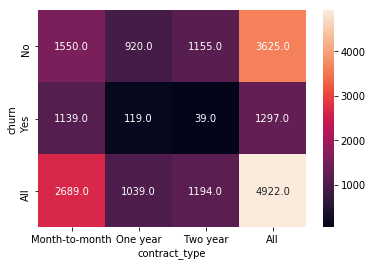

In [201]:
sns.heatmap(pd.crosstab(train.churn, train.contract_type, margins=True), annot=True, fmt='.1f')

Scatter matrix that plots all variables o we can see distributions on the diagonal and scatter plots everywhere else. Some variables are commented out so that the graph is easier to read.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b563eb8>,
      dtype=object)

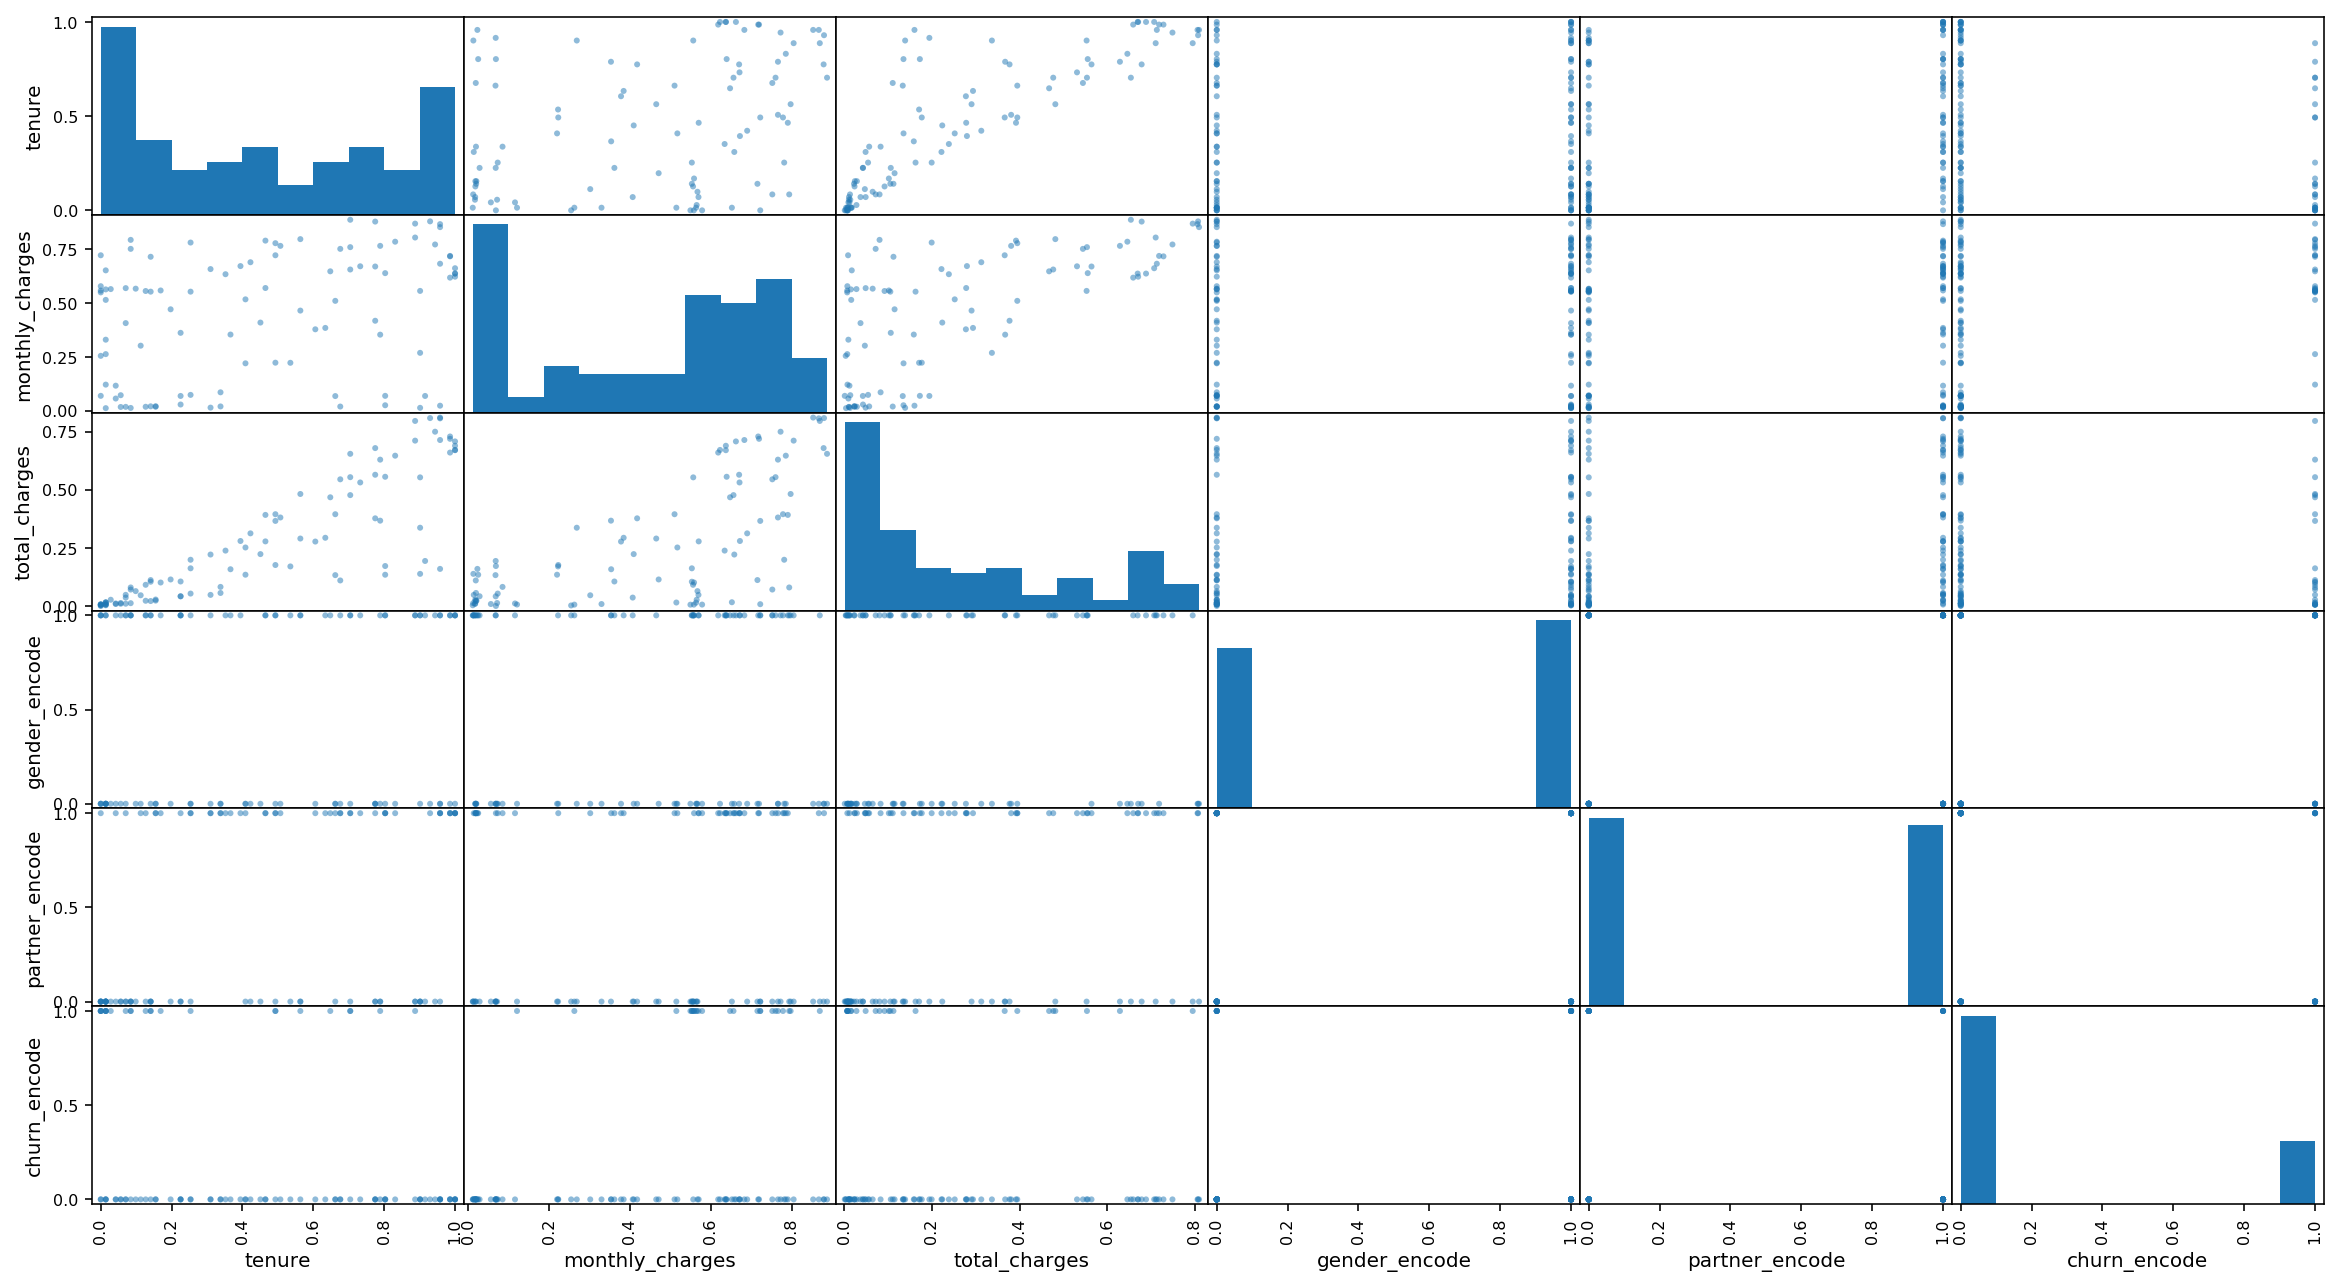

In [202]:
# switching to qt so the matrix opens in a new window
%matplotlib qt
pd.scatter_matrix(train[['tenure', 'monthly_charges', 'total_charges', 
#                               'better_internet_id', 'online_security_encode','online_backup_encode', 
#                               'device_protection_encode', 'tech_support_encode', 'streaming_tv_encode', 
#                               'streaming_movies_encode', 'paperless_billing_encode', 
#                               'multiple_lines_encode', 'phone_service_encode', 'dependents_encode', 
                              'gender_encode', 'partner_encode', 'churn_encode']].sample(100), figsize=(20,20))

Barplot showing the different monthly charges as tenure increases. In general, monthly charges increase as tenure increases.

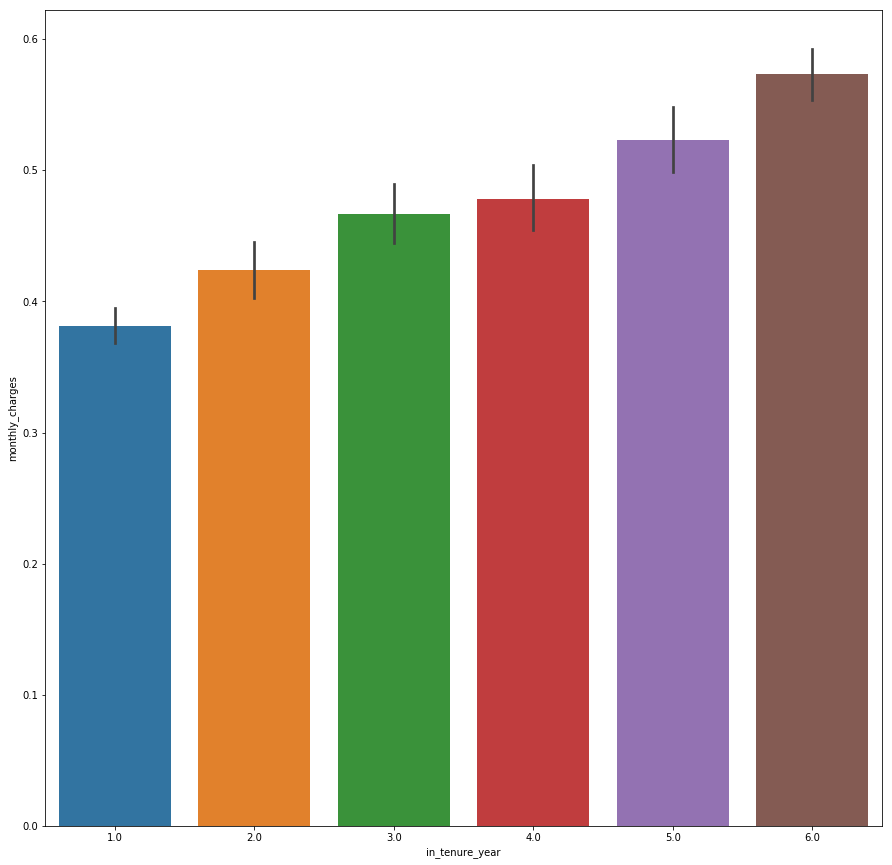

In [203]:
# switching back to inline
%matplotlib inline
plt.figure(figsize=(15,15))
sns.barplot(data=train, x='in_tenure_year', y='monthly_charges')

Swarmplot showing the monthly charges of different internet service types. It is also showing churn as different colors. Definitely a lot more churn in fiber optic group compared to the others. A sample of 1000 is taken to decrease load time.

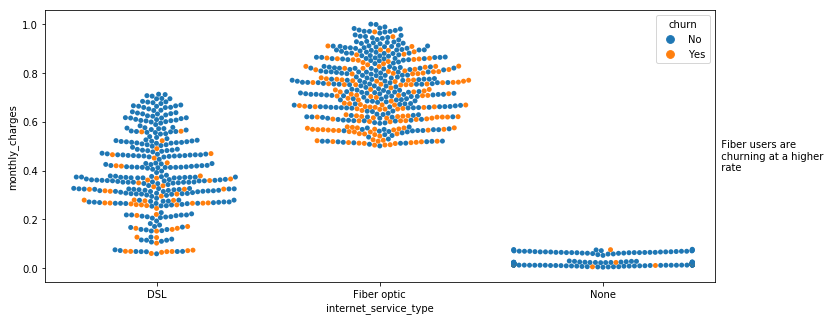

In [209]:
plt.figure(figsize=(12,5))
sns.swarmplot(data=train.sample(1000), x='internet_service_type', y='monthly_charges', hue='churn')
plt.annotate('''  Fiber users are 
  churning at a higher 
  rate''', (2.5, .4))
plt.show()

Pairplot for all variables. Double click to zoom in.

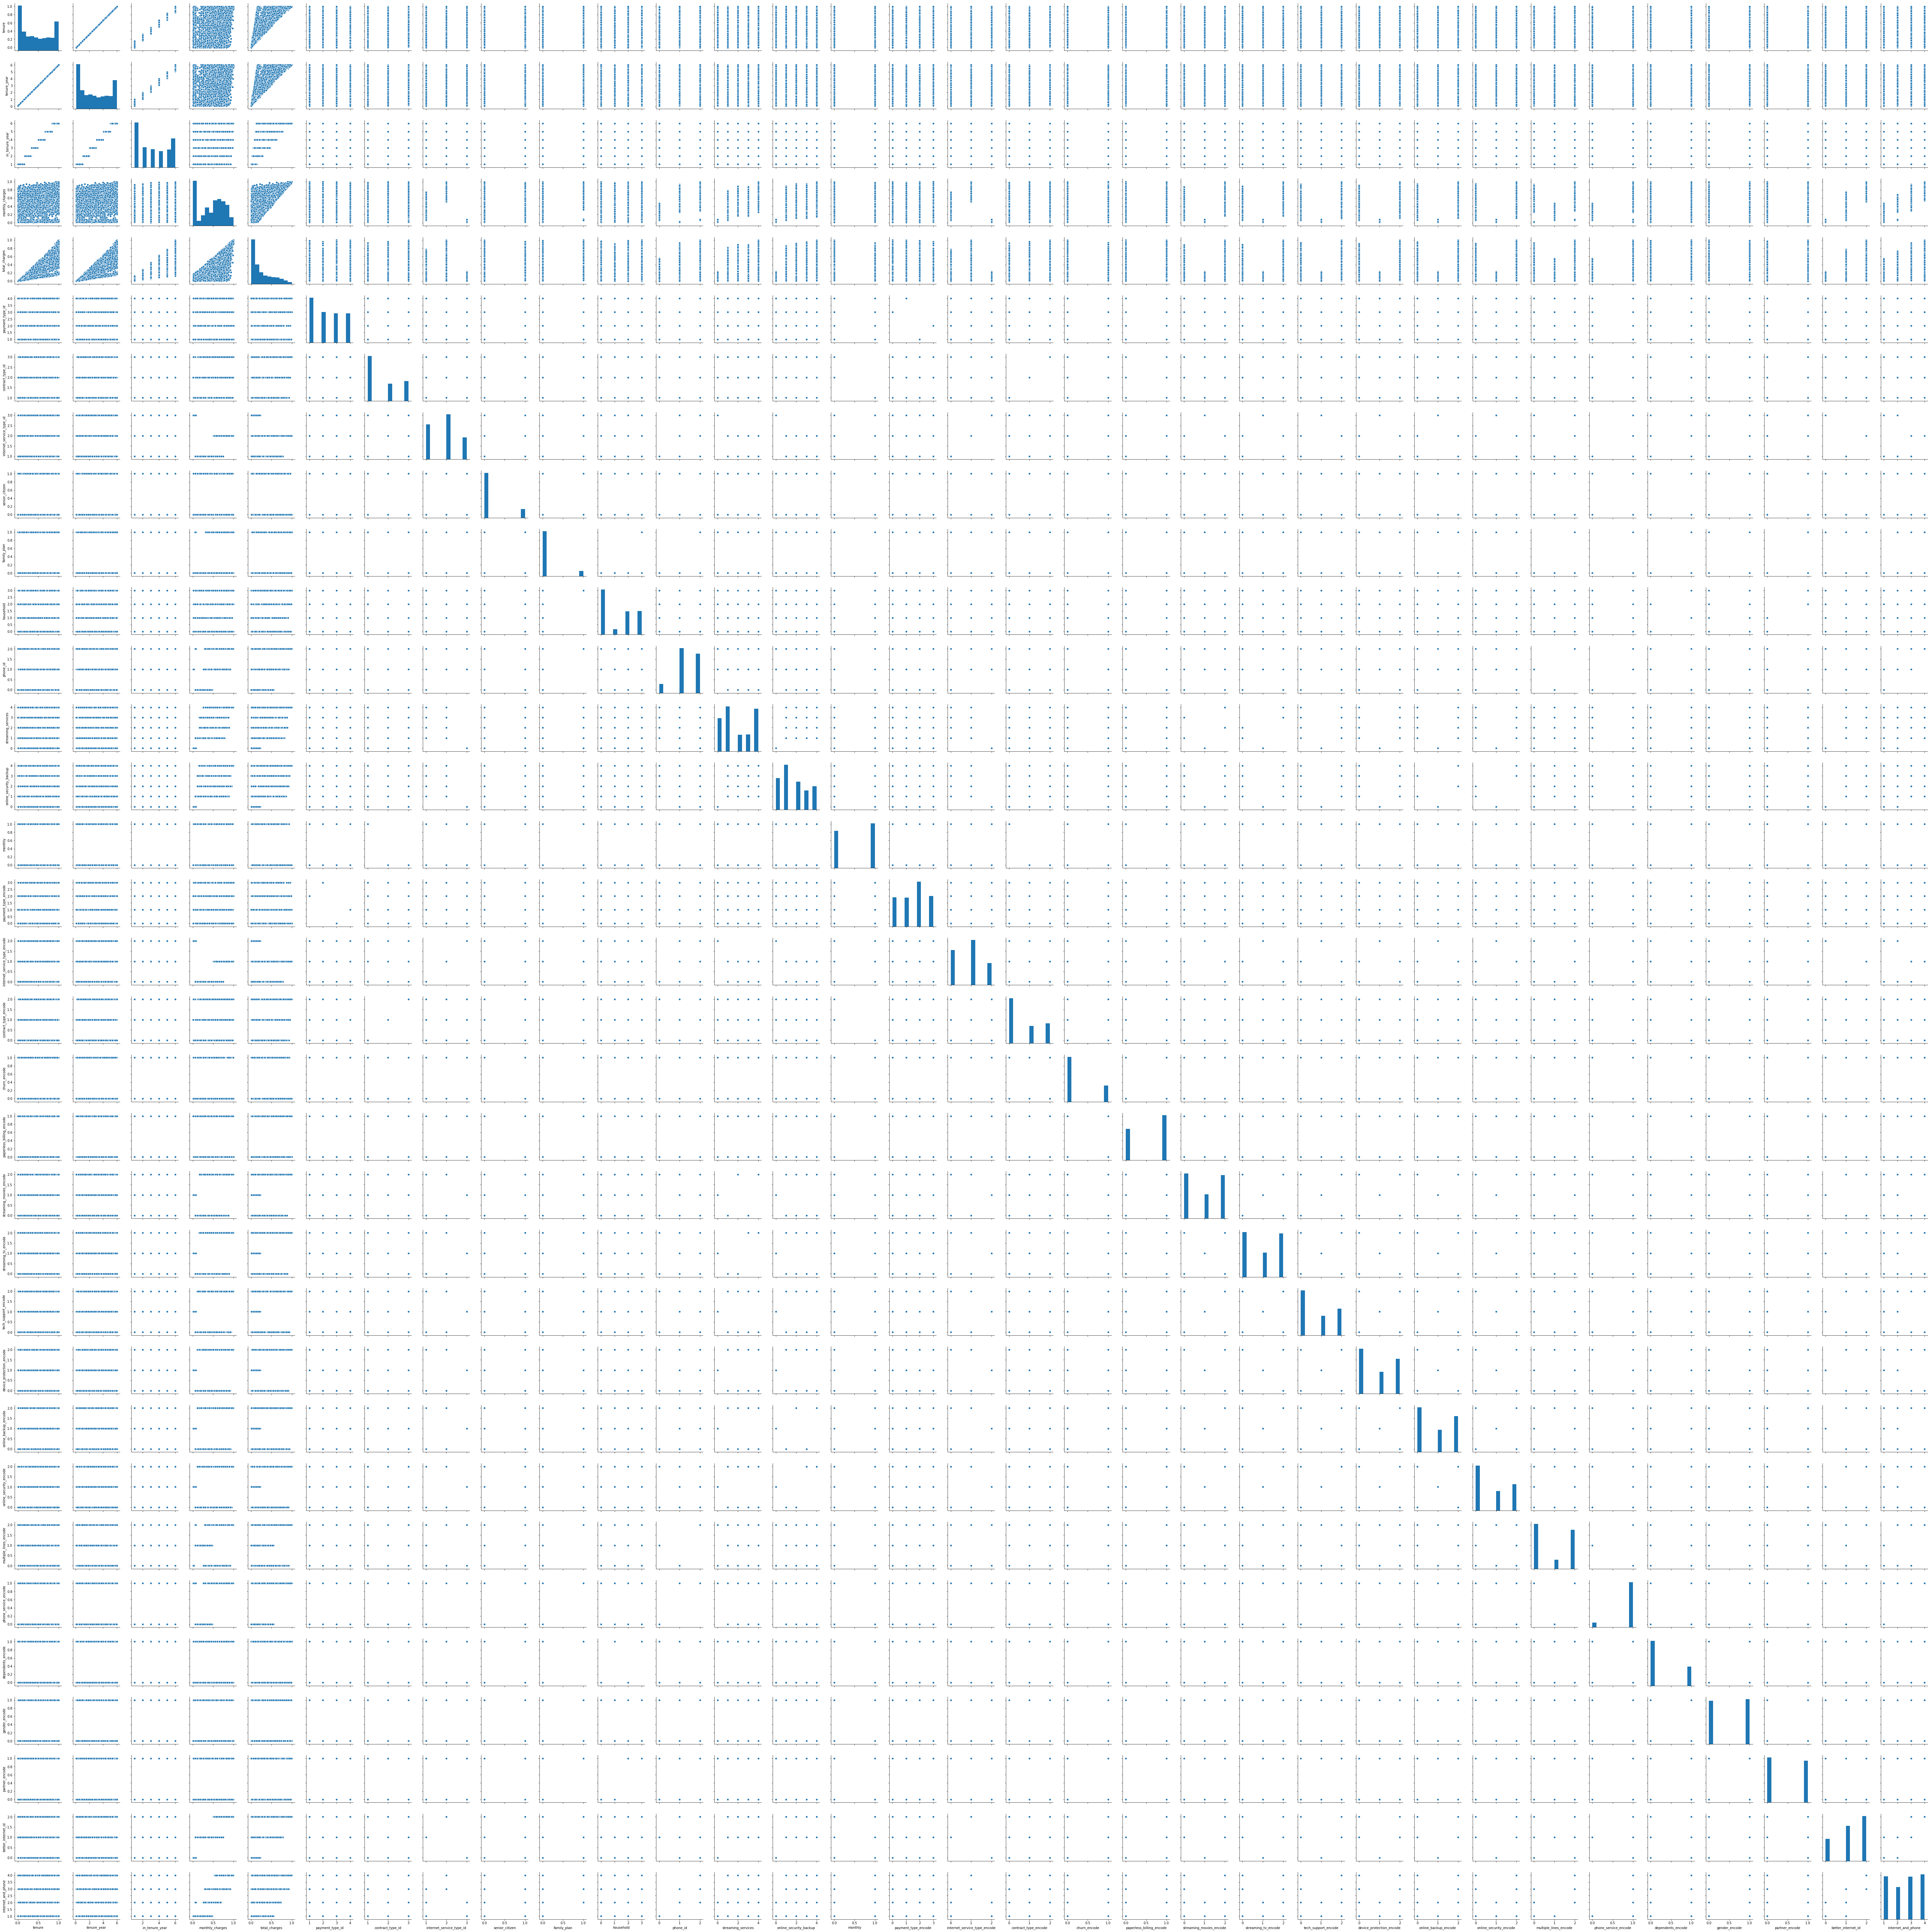

In [210]:
sns.pairplot(train)

Jointplot showing the combined internet and phone variable and comparing it to monthly charges. As services increase, monthly charges also increase.

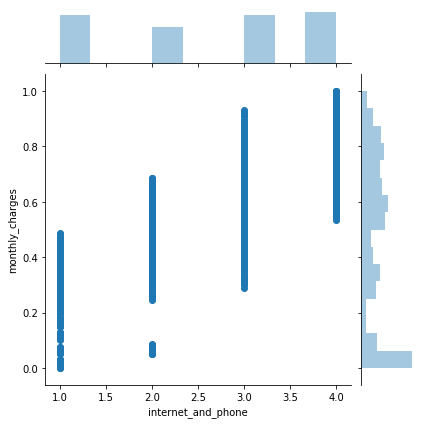

In [211]:
sns.jointplot(data=train, x='internet_and_phone', y='monthly_charges')

Relplot showing how the household variable interacts with monthly charges. Doesn't seem to be any relationship.

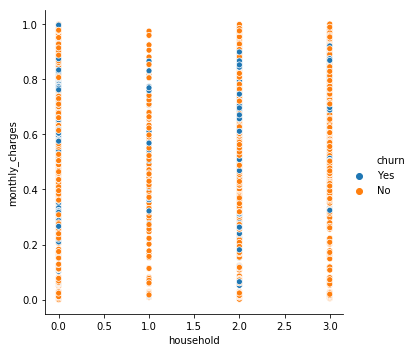

In [212]:
sns.relplot(data=train, y='monthly_charges', x='household', hue='churn')

Distplot showing the distribution of tenure. A large number of tenure is in the lower range, which makes sense since those are month to month customers who are leaving. There also seems to be a large number at the upper range.

Text(0.1, 2, 'Lots of customers churn in the first several months')

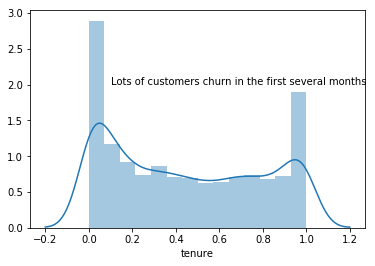

In [213]:
sns.distplot(train.tenure)
plt.annotate('Lots of customers churn in the first several months', (.1, 2))

A boxplot showing the distribution of tenure for customers who are senior citizens and those who are not, as well as if the churned or not.

Text(1.5, 0.5, 'Customers churn \n early on, regardless\n of age')

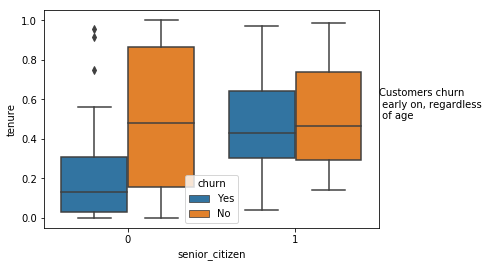

In [214]:
sns.boxplot(data=train.sample(100), y='tenure', x='senior_citizen', hue='churn')
plt.annotate('Customers churn \n early on, regardless\n of age', (1.5, .5))

A plot showing tenure and monthly charges.

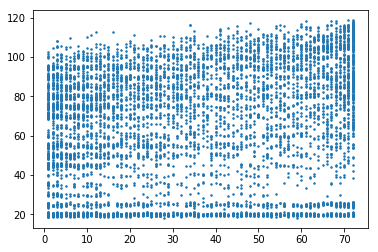

In [215]:
plt.plot(df_encoded.tenure, df_encoded.monthly_charges, linestyle='None', marker='.', markersize=3)

A pointplot showing tenure and total charges.

Text(10, 0.7, 'Customers who churn generally pay more')

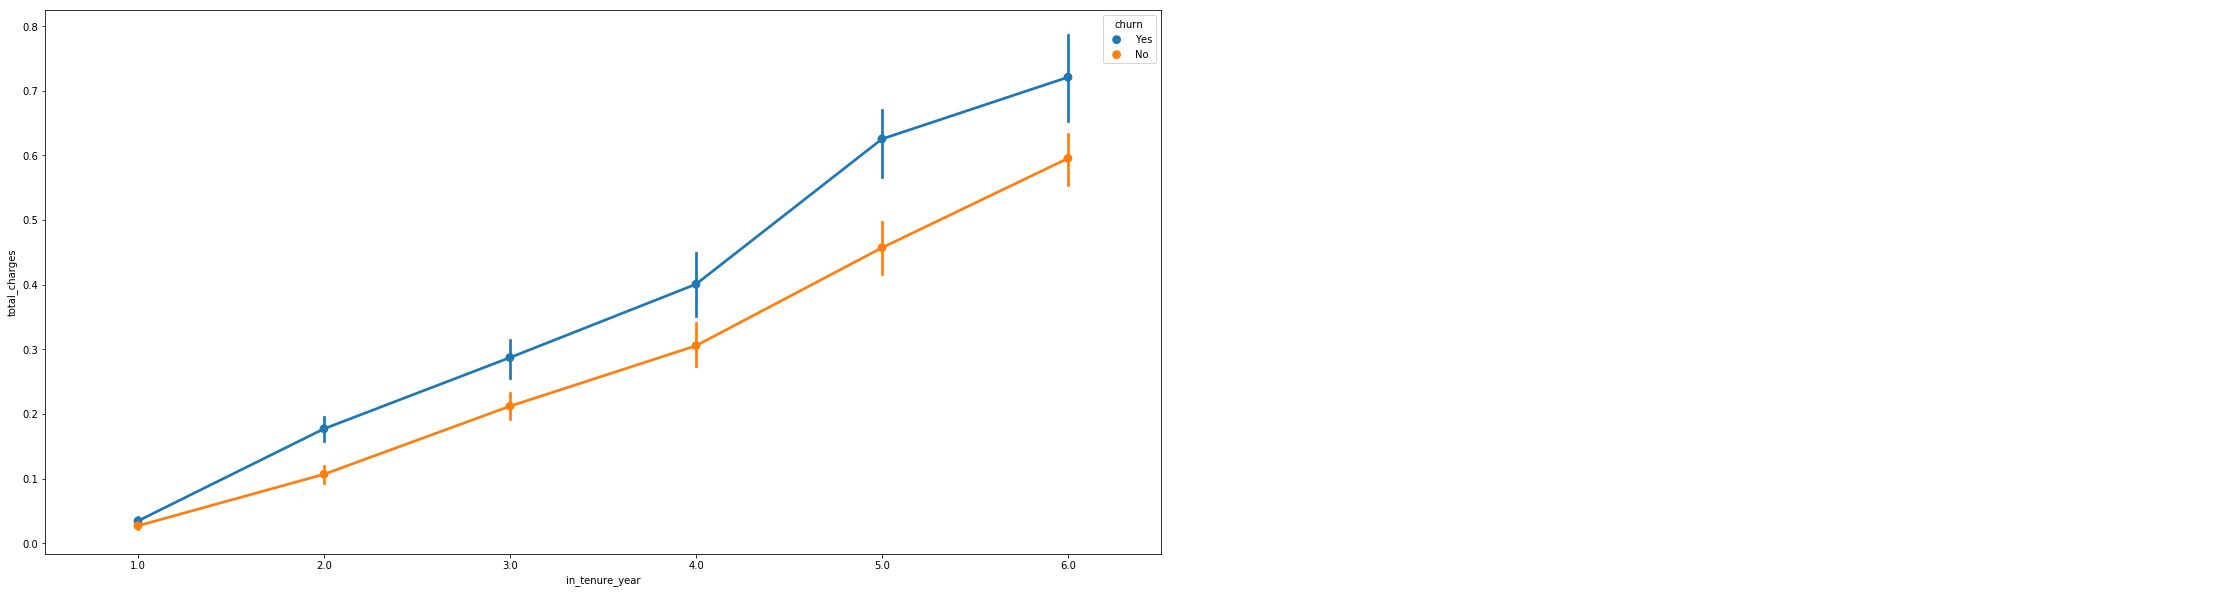

In [216]:
plt.figure(figsize=(20, 10))
sns.pointplot(data=train.sample(1000), x='in_tenure_year', y='total_charges', hue='churn')
plt.annotate('Customers who churn generally pay more', (10, 0.7))

#### What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

The top variables related to churn seem to be tenure, contract type, internet service type, tech support, online security, monthly charges, and senior citizen. Possible explanations into the relationships are decribed below:
- **tenure**: Tenure and churn seem to be negatively correlated. This means that customers are more likely to churn earlier in their relationship with us. This makes sense since majority of customers who churn are on month to month contracts, giving them the ability to churn before a year.
- **contract type**: As was mentioned above, majority of customers who churn are on month to month contracts. Unsurprisingly, customers take advantage of the freedom to easily switch companies if they want to.
- **internet service type**: The relationship found here was that fiber users are more likely to churn than DSL users or those without internet. A possible reason for this could be that our fiber service costs more than our competitors. Another reason, explored later, could be the additional services that come with internet. Are customers streaming, are they getting the internet options they want?
- **security variables(tech support and online security)**: When a customer has these options available to them, they are less likely to churn, specifically those customers with fiber. For whatever reason, lots of fiber users don't have these options and that might be causing them to churn. While unlikely, perhaps these are options that must be paid for and customers aren't paying for them. A better explanation might be that customers are simply unaware that these options are available to them. They don't know they can reach out to tech support or are unaware about our online security.
- **monthly charges**: This one is easily understandable. The more a customer pays, the more likely they are to look for cheaper prices elsewhere. If they can find cheaper prices for the same services, they will leave.
- **senior citizen**: Senior citizens have a 44% churn rate. Perhaps they are leaving for cheaper prices? This is a possibility, but looking at the data gives an alternative reason. A lot of senior citizens use fiber, and as stated earlier, fiber users have a high churn rate and a lot of fiber users don't have tech support. Can senior citizens be the reason for fiber's high churn rate?

Having seen these relationships and thinking about the reasoning for them, we should use these variables in our model. Fiber should be a positive for the company but it is actually a main source of churn. Being able to identify why fiber isn't performing well with customer retention is key to improving our business. Month to month customers churn, unsurprisingly, but can their churn rate be decreased?

In the models we will be creating, we hope to use these variables to:
1. Identify the drivers of churn
1. Identify the customers who are likely to churn

We will be making classification models, likely Logistic Regression and Decision Tree. K Nearest Neighbors and Random Forest might also be considered, but they are hard to explain so they might be skipped over.

# Modeling

In [217]:
spec_train = train[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 'monthly_charges', 'senior_citizen', 'churn']]

spec_test = test[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 'monthly_charges', 'senior_citizen', 'churn']]

## Logistic Regression

#### Model 1 with all variables

Performs the best for Linear Regression models

In [218]:
lr1 = LogisticRegression(random_state=123)
lr1.fit(train[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 
                  'monthly_charges', 'senior_citizen']], train.churn)
lr1_pred = lr1.predict(train[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 'monthly_charges', 'senior_citizen']])

In [219]:
lr1.score(train[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 
                  'monthly_charges', 'senior_citizen']], train.churn)

0.7941893539211703

In [220]:
confusion_matrix(train.churn, lr1_pred)

array([[3253,  372],
       [ 641,  656]])

In [221]:
print(classification_report(train.churn, lr1_pred))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      3625
         Yes       0.64      0.51      0.56      1297

   micro avg       0.79      0.79      0.79      4922
   macro avg       0.74      0.70      0.71      4922
weighted avg       0.78      0.79      0.79      4922



In [222]:
# 'tenure', 'contract_type_id', 'internet_service_type_id', 
#                     'tech_support_encode', 'online_security_encode', 
#                   'monthly_charges', 'senior_citizen'

In [223]:
lr1.coef_

# According to this model, monthly charges and tenure seem to be the best predictor on 
# whether a customer will churn. The lower the tenure the more likely to churn, same as 
# monthly charges increase. Next is contract type id. As contract type id decrease, which 
# means the contract length is getting shorter, the customer is more likely to churn. 
# Online security and tech support are next, where having these options make it less likely
# to churn. Being a senior citizen will make the customer more likely to churn. Internet type
# has the smallest effect.




array([[-2.26328198, -0.75000608,  0.01919791, -0.30730698, -0.32114129,
         2.53402436,  0.28942492]])

#### Model 2 without monthly charges

Performs slightly worse than Model 1.

In [224]:
lr2 = LogisticRegression(random_state=123)
lr2.fit(train[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 
                  'senior_citizen']], train.churn)
lr2_pred = lr2.predict(train[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 'senior_citizen']])

lr2.score(train[['tenure', 'contract_type_id', 'internet_service_type_id', 
                    'tech_support_encode', 'online_security_encode', 
                  'senior_citizen']], train.churn)

0.7891101178382771

In [225]:
print(classification_report(train.churn, lr2_pred))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      3625
         Yes       0.63      0.49      0.55      1297

   micro avg       0.79      0.79      0.79      4922
   macro avg       0.73      0.69      0.71      4922
weighted avg       0.78      0.79      0.78      4922



## Decision Tree

After tweaking the max_depth, a depth of 5 seemed to be best.

In [226]:
tree1 = DecisionTreeClassifier(random_state=123, max_depth=5)
tree1.fit(spec_train.drop(['churn'], axis=1), spec_train.churn)
tree1_pred = tree1.predict(spec_train.drop(['churn'], axis=1))

In [227]:
tree1.score(spec_train.drop(['churn'], axis=1), spec_train.churn)

0.798049573344169

In [228]:
print(classification_report(spec_train.churn, tree1_pred))

              precision    recall  f1-score   support

          No       0.87      0.86      0.86      3625
         Yes       0.61      0.63      0.62      1297

   micro avg       0.80      0.80      0.80      4922
   macro avg       0.74      0.74      0.74      4922
weighted avg       0.80      0.80      0.80      4922



In [229]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = spec_train.drop(['churn'], axis=1).columns
class_names = spec_train.churn

dot = export_graphviz(
    tree1,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names, # target value names
    special_characters=True,
    filled=True,             # fill nodes w/ informative colors
    impurity=False,          # show impurity at each node
    leaves_parallel=True,    # all leaves at the bottom
    proportion=True,         # show percentages instead of numbers at each leaf
    rotate=True,             # left to right instead of top-bottom
    rounded=True,            # rounded boxes and sans-serif font
)

graph = graphviz.Source(dot, filename='telco_decision_tree', format='png')
graph.view(cleanup=True)

'telco_decision_tree.png'

In [230]:
tree_test_pred = tree1.predict(spec_test.drop(['churn'], axis=1))
tree1.score(spec_test.drop(['churn'], axis=1), spec_test.churn)

0.7815165876777251

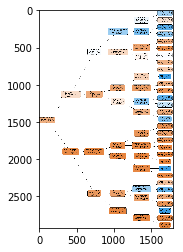

In [231]:
image = mpimg.imread("telco_decision_tree.png")
plt.imshow(image)
plt.show()